<a href="https://colab.research.google.com/github/Gaurav2912/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=1q12QkUJV93coNY1p2iQV15UHxfkH4na0" align="left" hspace="25px" vspace="20px" width="40" height="50" ></p>


## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


![](https://miro.medium.com/max/828/0*bepdYypteRGfqJYP.jpg)

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=1pNPWpgMSrFyFEo7TLhqOZXnSTicDLHLe" align="left" hspace="10px" vspace="10px" width="55" height="65" ></p>



## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Roadmap**

![](https://ab-strapi-qa.s3.ap-south-1.amazonaws.com/bike_sharing_34496d0e96.png)

In [ ]:
# Mount Drive to load data.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import numpy as np
from numpy import math
import time
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import pandas as pd
import scipy as sp

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.feature_selection import SelectFromModel

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

import xgboost as xgb
from xgboost import plot_importance

import lightgbm 
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# For displaying ploty plot in colab nootbook
import plotly.io as pio
pio.renderers.default = "colab"

In [ ]:
# Read the csv file
path = "/content/drive/MyDrive/Colab Notebooks/capstone project/Bike Sharing Demand Prediction/"
df = pd.read_csv(path + "SeoulBikeData.csv",encoding= 'unicode_escape')

In [ ]:
# Head of the data frame
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
# tail of the data frame
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [ ]:
# Check the dimension of data drame
df.shape

(8760, 14)

This dataset contains 8760 rows and 14 columns.

----
**Confirm quickly with .info() methods the datatypes and null values in our dataframe.**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

 "Seasons", "Holiday", "Functioning Day" are strings (possibly categories) and rest columns are numerical data.

---
**Get a quick statistical summary of the numeric columns with .describe()**

In [ ]:
df.describe().T

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

In [ ]:
df.describe(include=[object])

Date Seasons     Holiday Functioning Day
count         8760    8760        8760            8760
unique         365       4           2               2
top     01/12/2017  Spring  No Holiday             Yes
freq            24    2208        8328            8465

# Null Values

In [ ]:
# conferming null values with diffretnt method 
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

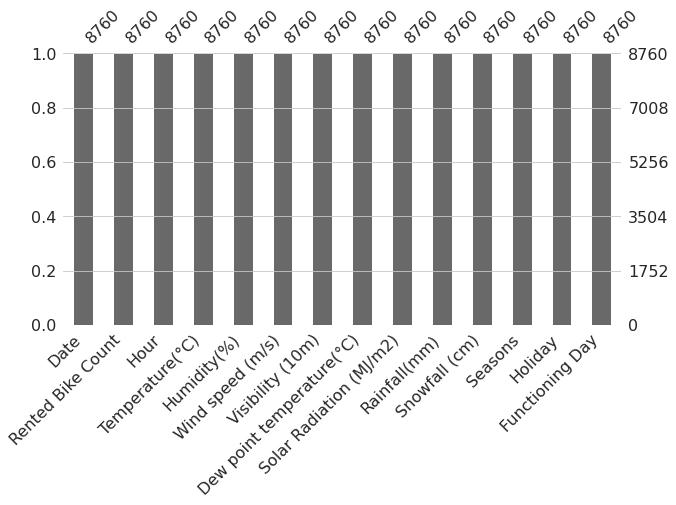

In [ ]:
# Visualize the number of missing
# values as a bar chart
msno.bar(df, figsize= (10,5));

In [ ]:
# Check for duplicated entries.
print("Duplicate entry in data:",len(df[df.duplicated()])) 

Duplicate entry in data: 0


* From above we can see that, there is not a single missing value anywhere in Data Frame.
* Not a single duplicate entry in data frame.
<br/>

# Feature Engineering

Extract part of date

* Year
* Month
* Day
* Weekday


In [ ]:
# Convert it to datetime object
df['Date'] =  pd.to_datetime(df['Date'])

def add_dateparts(df, col):
  """
  Extract and create year, month, Day, Weekday and Hour
  """

  df['Year'] = df[col].dt.year
  df['Day'] = df[col].dt.day   # 0 - 31
  # split day of week, month and year in three column
  df['WeekDay'] = df[col].dt.weekday # extract week name from Date column
  df["Month"] = df[col].dt.month  # extract month name from Date column


# creating datepart
add_dateparts(df, 'Date')

# Now it is time to drop the feature
df.drop("Date",axis= 1, inplace=True)

# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Year                       8760 non-null   int64

In [ ]:
# Checking for unique values 
df.nunique().sort_values()

Year                            2
Functioning Day                 2
Holiday                         2
Seasons                         4
WeekDay                         7
Month                          12
Hour                           24
Day                            31
Snowfall (cm)                  51
Rainfall(mm)                   61
Wind speed (m/s)               65
Humidity(%)                    90
Solar Radiation (MJ/m2)       345
Temperature(°C)               546
Dew point temperature(°C)     556
Visibility (10m)             1789
Rented Bike Count            2166
dtype: int64

In [ ]:
# set default gridtype, fontsize and palette
sns.set_style("whitegrid")
sns.set_palette(palette = ['#4169E1', '#FF5F15', '#4CBB17', '#676FA3'])
plt.rcParams['font.size'] = 14

# Exploratory Data Analysis

---

A quick look of Histogram of each numerical attributes, to understand their distribution.



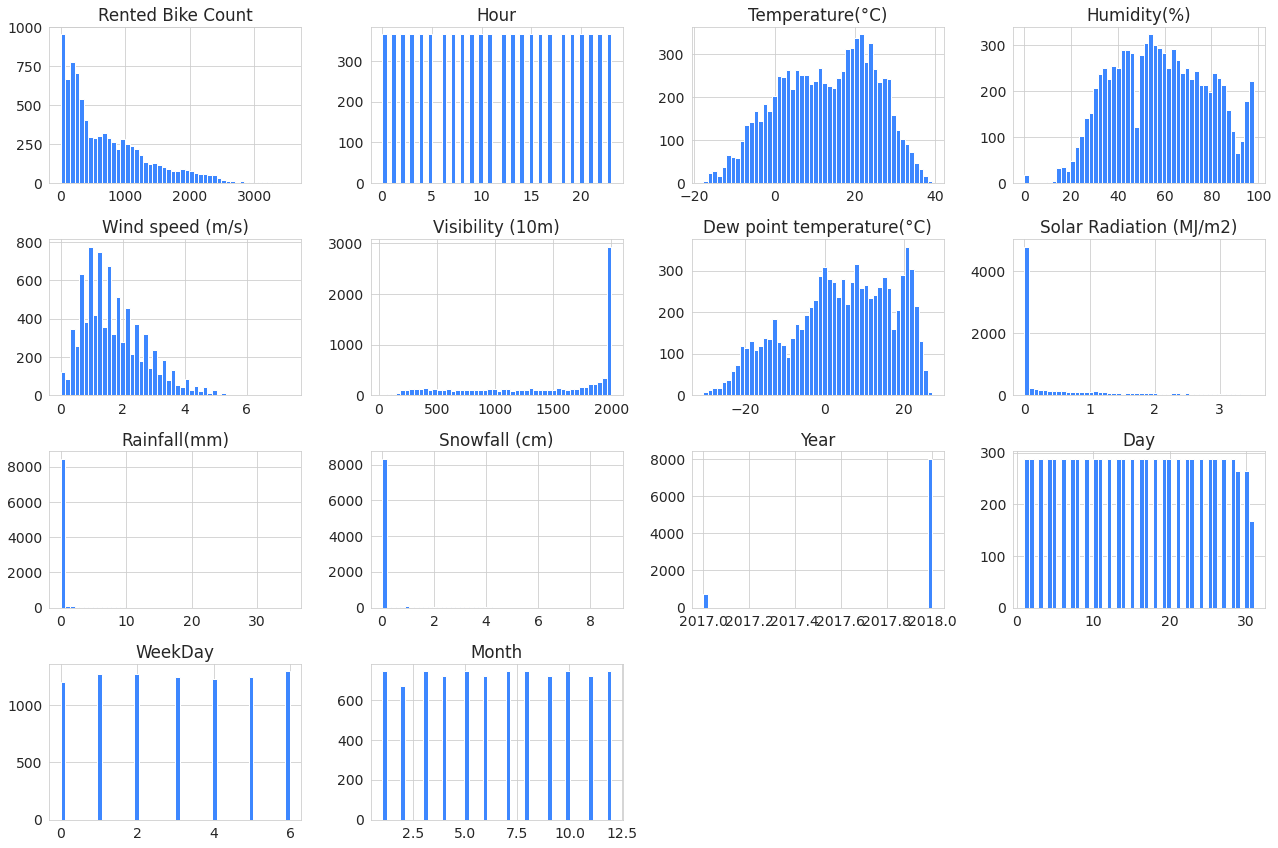

In [ ]:
# plot of histogram 
df.hist(bins= 50, figsize= (18,12), color=  '#3d87ff')
# add title
plt.title("Histogram for each numerical attribute.", fontsize= 18)
# to prevent overlapping of text in plot
plt.tight_layout()
plt.show();


Now I will divide this into two parts, once for the count plot and the other for the histogram.

The count plot will have those features which have less than 32 unique values.

In [ ]:
def columns_with_uniqevals(init, final):
  """return list of column with values between init to final."""

  return [col for col in df.columns if  init <= len(df[col].unique()) <= final]

In [ ]:
# non binary feature that have less than 32 unique values 
features_cplot = columns_with_uniqevals(3, 32)
features_cplot

['Hour', 'Seasons', 'Day', 'WeekDay', 'Month']

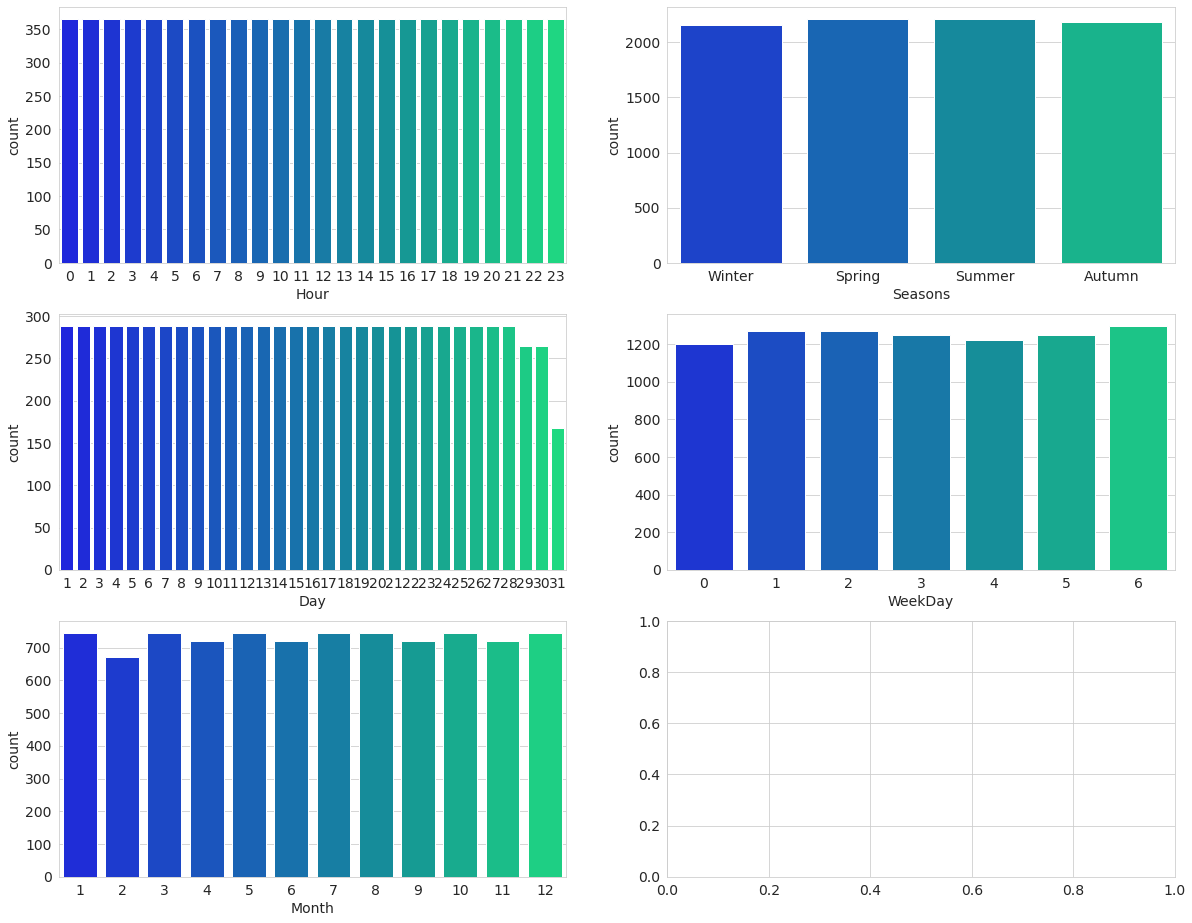

In [ ]:
# Creates a blanck canvas
fig, axes = plt.subplots(figsize=(20, 16), nrows= 3, ncols= 2)

# count plot for non - binary categorical variable
for i, feature in enumerate(features_cplot):
  ax = axes[i//2, i % 2]
  sns.countplot(data= df, x= feature, ax= ax, palette= 'winter')

* According to the count plot, all the values are approximately equal, except for days, because 5 out of 12 months have only 30 days.

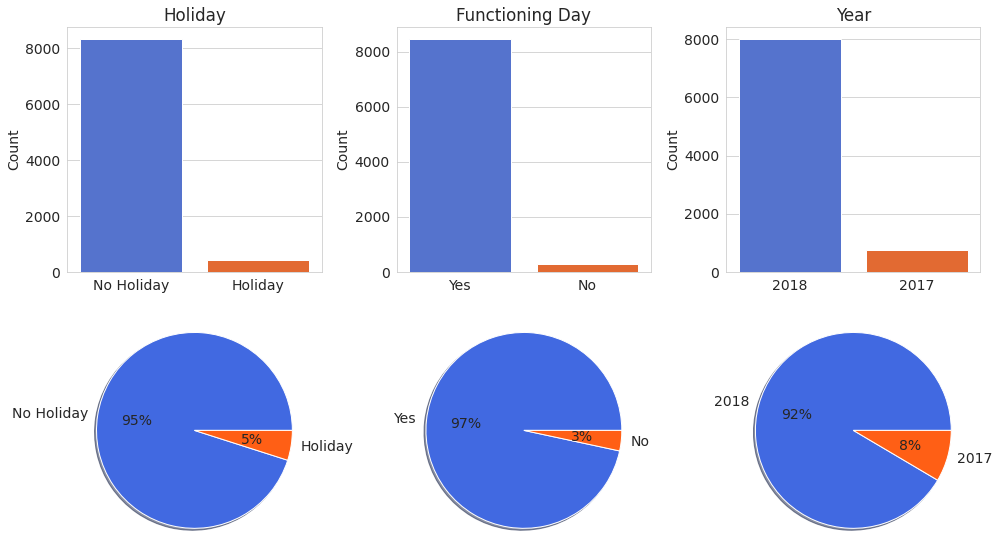

In [ ]:
# Creates a blanck canvas
fig, axes = plt.subplots(figsize=(14,8), nrows= 2, ncols= 3)

# binary features
for i, col in enumerate(columns_with_uniqevals(1, 2)):

  col_index = df[col].value_counts().index
  col_val = df[col].value_counts().values
  # for I row to see count

  sns.barplot(x= col_index, y= col_val, ax= axes[0,i], order= col_index).set_title(col)  # we can also use countplot

  # set y-label in 1st row
  axes[0,i].set_ylabel("Count")
  # piechart for II  row to see percentage
  axes[1,i].pie(df[col].value_counts(), labels = df[col].value_counts().keys(),
                autopct='%.0f%%', shadow=True)


plt.tight_layout();

* Binary variables are highly imbalanced.
   * Few holidays, most working days.
   * Most of the information is from 2018.

In [ ]:
# histogram of target variable
fig = px.histogram(df, x='Rented Bike Count', marginal="box", 
                   title="Histogram of Rented Bike Count")

fig.show()

* Target variable is positively skewed, also have few outliers.

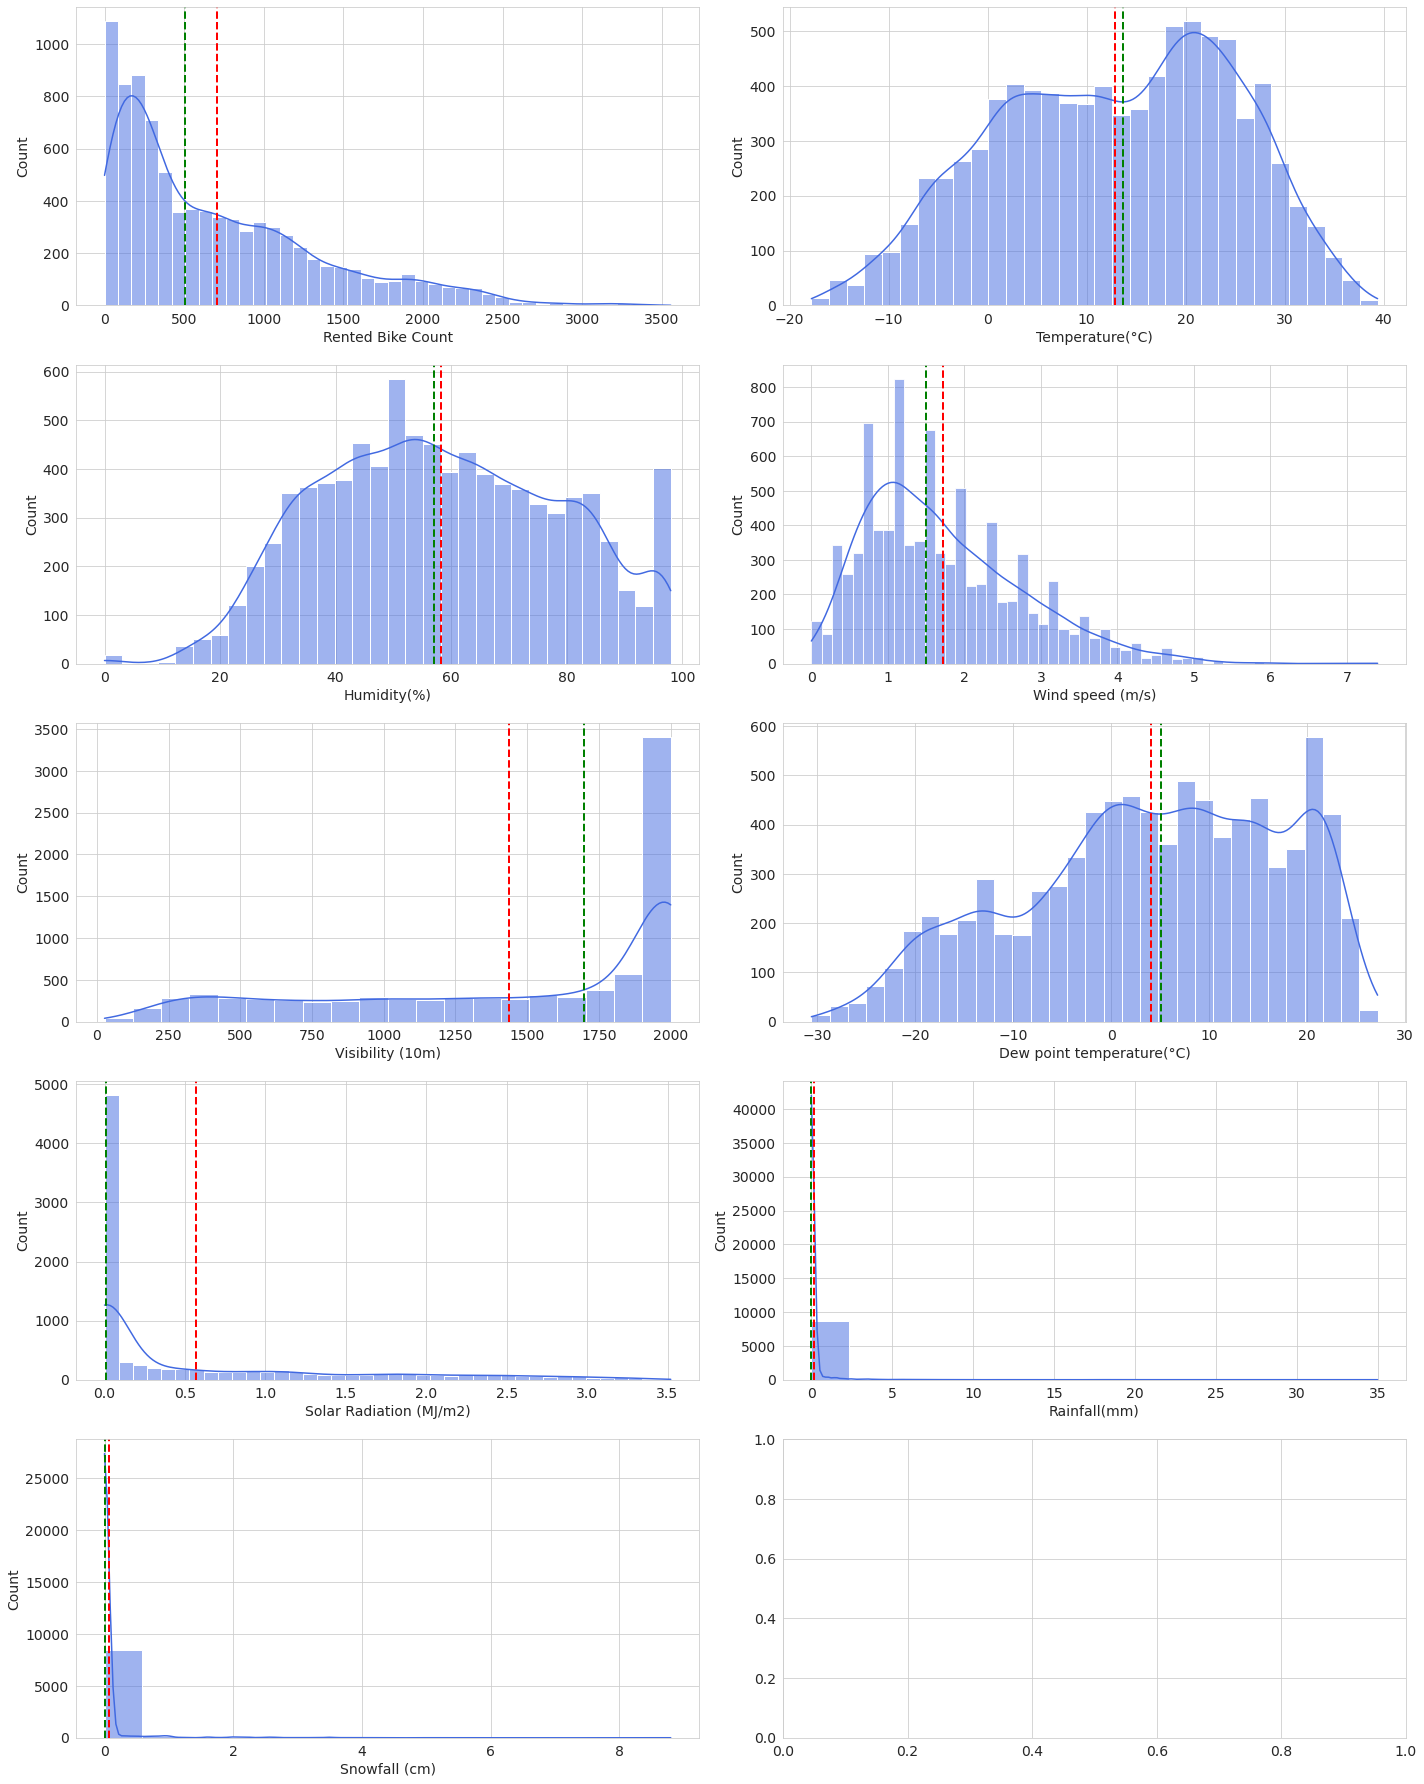

In [ ]:
def histogram_plots(df):     

  # Creates a blanck canvas
  fig, axes = plt.subplots(figsize=(20, 25), nrows= 5, ncols= 2)

  # feature that have grater than 32 unique values
  features_hist = [col for col in df.columns  if len(df[col].unique()) > 32]

  # Histogram of Numeric Features in the list
  for i, feature in enumerate(features_hist):
    ax = axes[i//2, i % 2]
    sns.histplot(data= df, x = feature, ax = ax, kde= True)
    # red vartical line at mean
    ax.axvline(df[feature].mean(), color='red', linestyle='--', linewidth=2)   
    # green vartical line at median
    ax.axvline(df[feature].median(), color='green', linestyle='--', linewidth=2)  

  plt.tight_layout();

histogram_plots(df)

Positively skewed features 
* Rented Bike Count
* Wind speed (m/s)
* Solar Radiation (MJ/m2)
* Rainfall(mm)
* Snowfall (cm)

Negatively skewed features 
* Visibility (10m)


In [ ]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Year', 'Day', 'WeekDay', 'Month'],
      dtype='object')

# Correlation check


Before doing Correlation check, we need to do one hot encoding for categorical variables.


In [ ]:
# converting Year feature from int data type to string format
df["Year"]= df["Year"].astype(str)

In [ ]:
df_objs = df.select_dtypes(include= 'object')  # data frame with categorical feature

df_nums = df.select_dtypes(exclude= 'object')  # data frame with numerical features (including boolean datatype)

In [ ]:
# to create dummy variables, drop_firt is for one hot-encoding
df_objs_encoded = pd.get_dummies(df_objs, drop_first= True)

# concatinate state , numeric and object (after one-hot encoding)  columns 
df_final = pd.concat([df_nums, df_objs_encoded], axis= 1)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Day                        8760 non-null   int64  
 11  WeekDay                    8760 non-null   int64  
 12  Month                      8760 non-null   int64  
 13  Seasons_Spring             8760 non-null   uint8

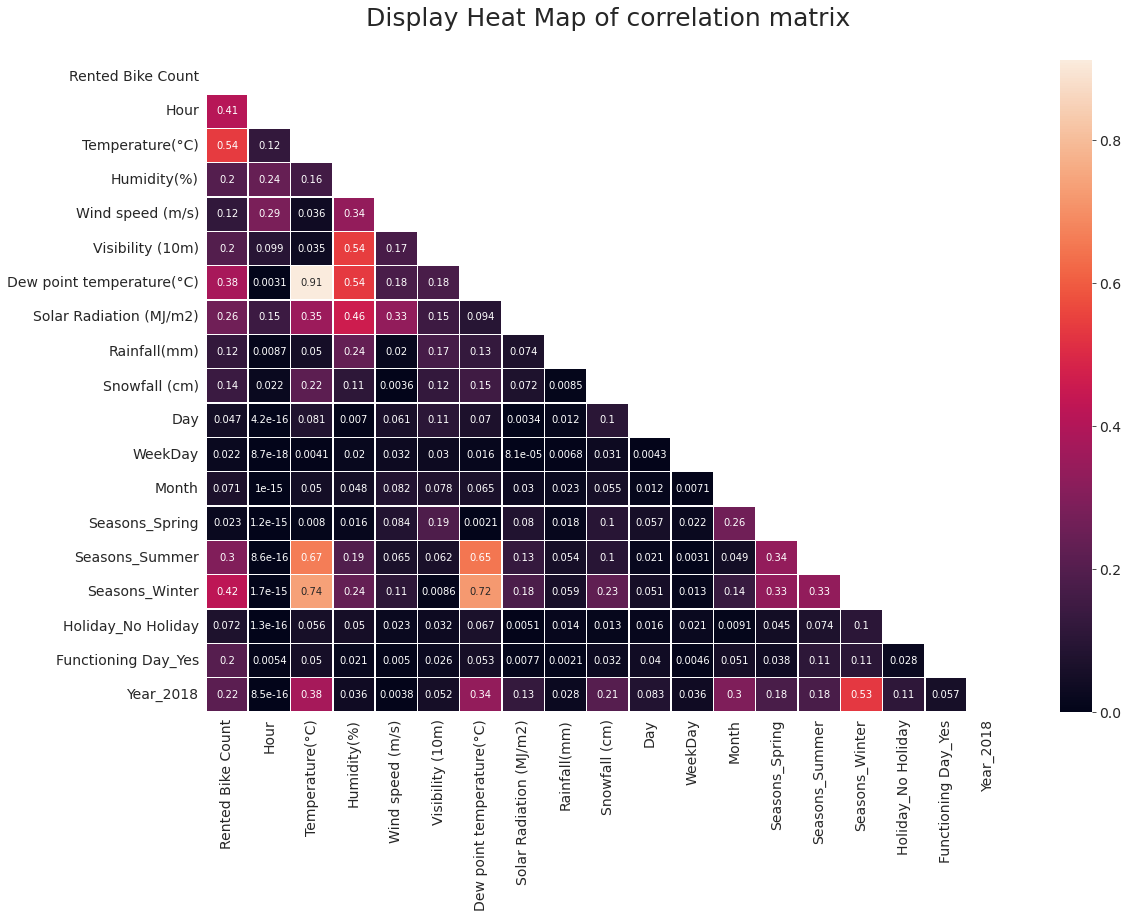

In [ ]:
# for finding correlation matrix , using .corr() method
corr_df = df_final.corr()

# Creates a blanck canvas
plt.figure(figsize= (18,12))

# creating mask for lower triangular matrix
mask = np.triu(np.ones_like(corr_df))

# plotting heat map of correlation matrix
sns.heatmap(abs(corr_df), annot= True, annot_kws={"size":10}, mask= mask, linewidth= .5)
# add title
plt.title("Display Heat Map of correlation matrix\n", fontsize= 25);

* Temperature and Dew point temperature are highly correlated.

In [ ]:
# correlation with target variable
corr_to_label  = corr_df['Rented Bike Count'].sort_values(ascending= False).iloc[1:]  # first value is 1 (self correlation), so we ignoring it. 
corr_to_label  

Temperature(°C)              0.538558
Hour                         0.410257
Dew point temperature(°C)    0.379788
Seasons_Summer               0.296549
Solar Radiation (MJ/m2)      0.261837
Year_2018                    0.215162
Functioning Day_Yes          0.203943
Visibility (10m)             0.199280
Wind speed (m/s)             0.121108
Holiday_No Holiday           0.072338
Month                        0.070861
Day                          0.046849
Seasons_Spring               0.022888
WeekDay                     -0.021577
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Humidity(%)                 -0.199780
Seasons_Winter              -0.424925
Name: Rented Bike Count, dtype: float64

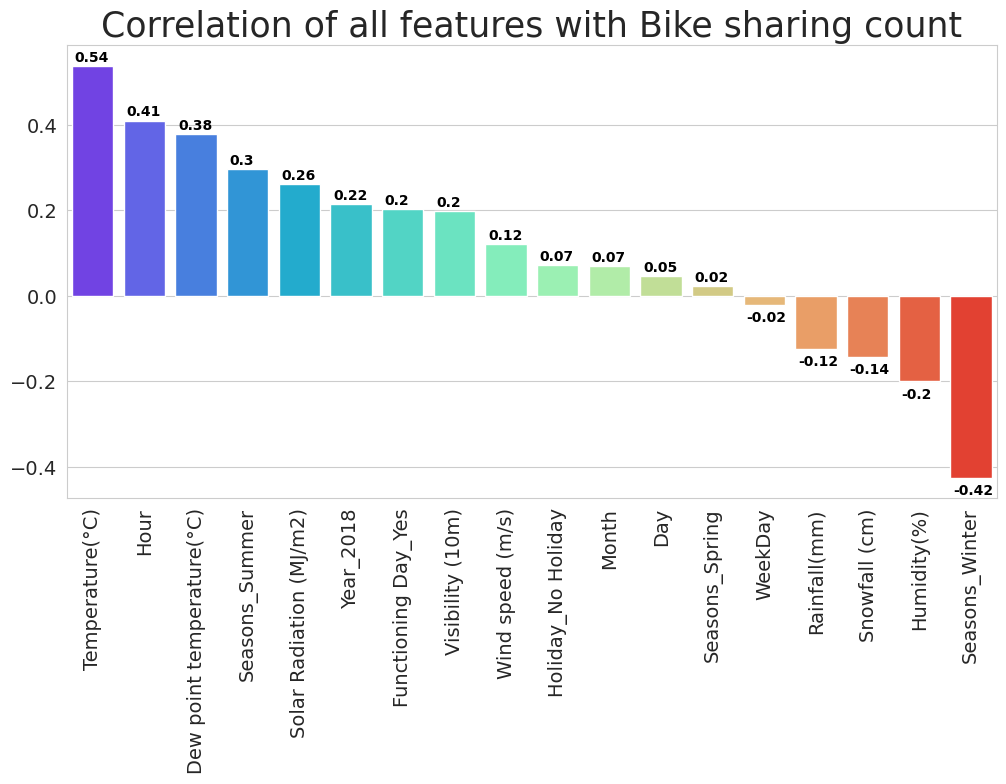

In [ ]:
# Creates a blanck canvas
plt.figure(figsize=(12,6), dpi= 100)

# bar plot for correlation value of all features with target variable
sns.barplot(x=corr_to_label.index,y= corr_to_label.values, palette= 'rainbow')

#  add title
plt.title("Correlation of all features with Bike sharing count", fontsize= 25)

# writing text on plot
for i in range(len(corr_to_label)):

  # positive values are on top of bar 
  if corr_to_label.iloc[i] > 0:
    plt.text(x= i- 0.35,y= corr_to_label.iloc[i] + 0.01,
           s= round(corr_to_label.iloc[i], 2), fontsize=10,
                color= 'black', weight='bold')
  
  # negative values are just below the bar
  else:
     plt.text(x= i- 0.35,y= corr_to_label.iloc[i]- 0.04,
           s= round(corr_to_label.iloc[i], 2), fontsize=10,
                color= 'black', weight='bold')

# rotating test on x-axis  
plt.xticks(rotation=90);

* Postive correlation of Rented bike count with Hour, Temperature,Dew point Temperature, Solar Radiaton, Seasons_Summer.

* Bike sharing count is negatively correlated to Humidity, Snowfall, Rainfall and Season_Winter.

<br/>

---


**Boxplot and Barplot of categorical featute with Ranted Bike Count.**
* Box plot is median and quantile based
* Bar plot is for mean and Standard deviation.

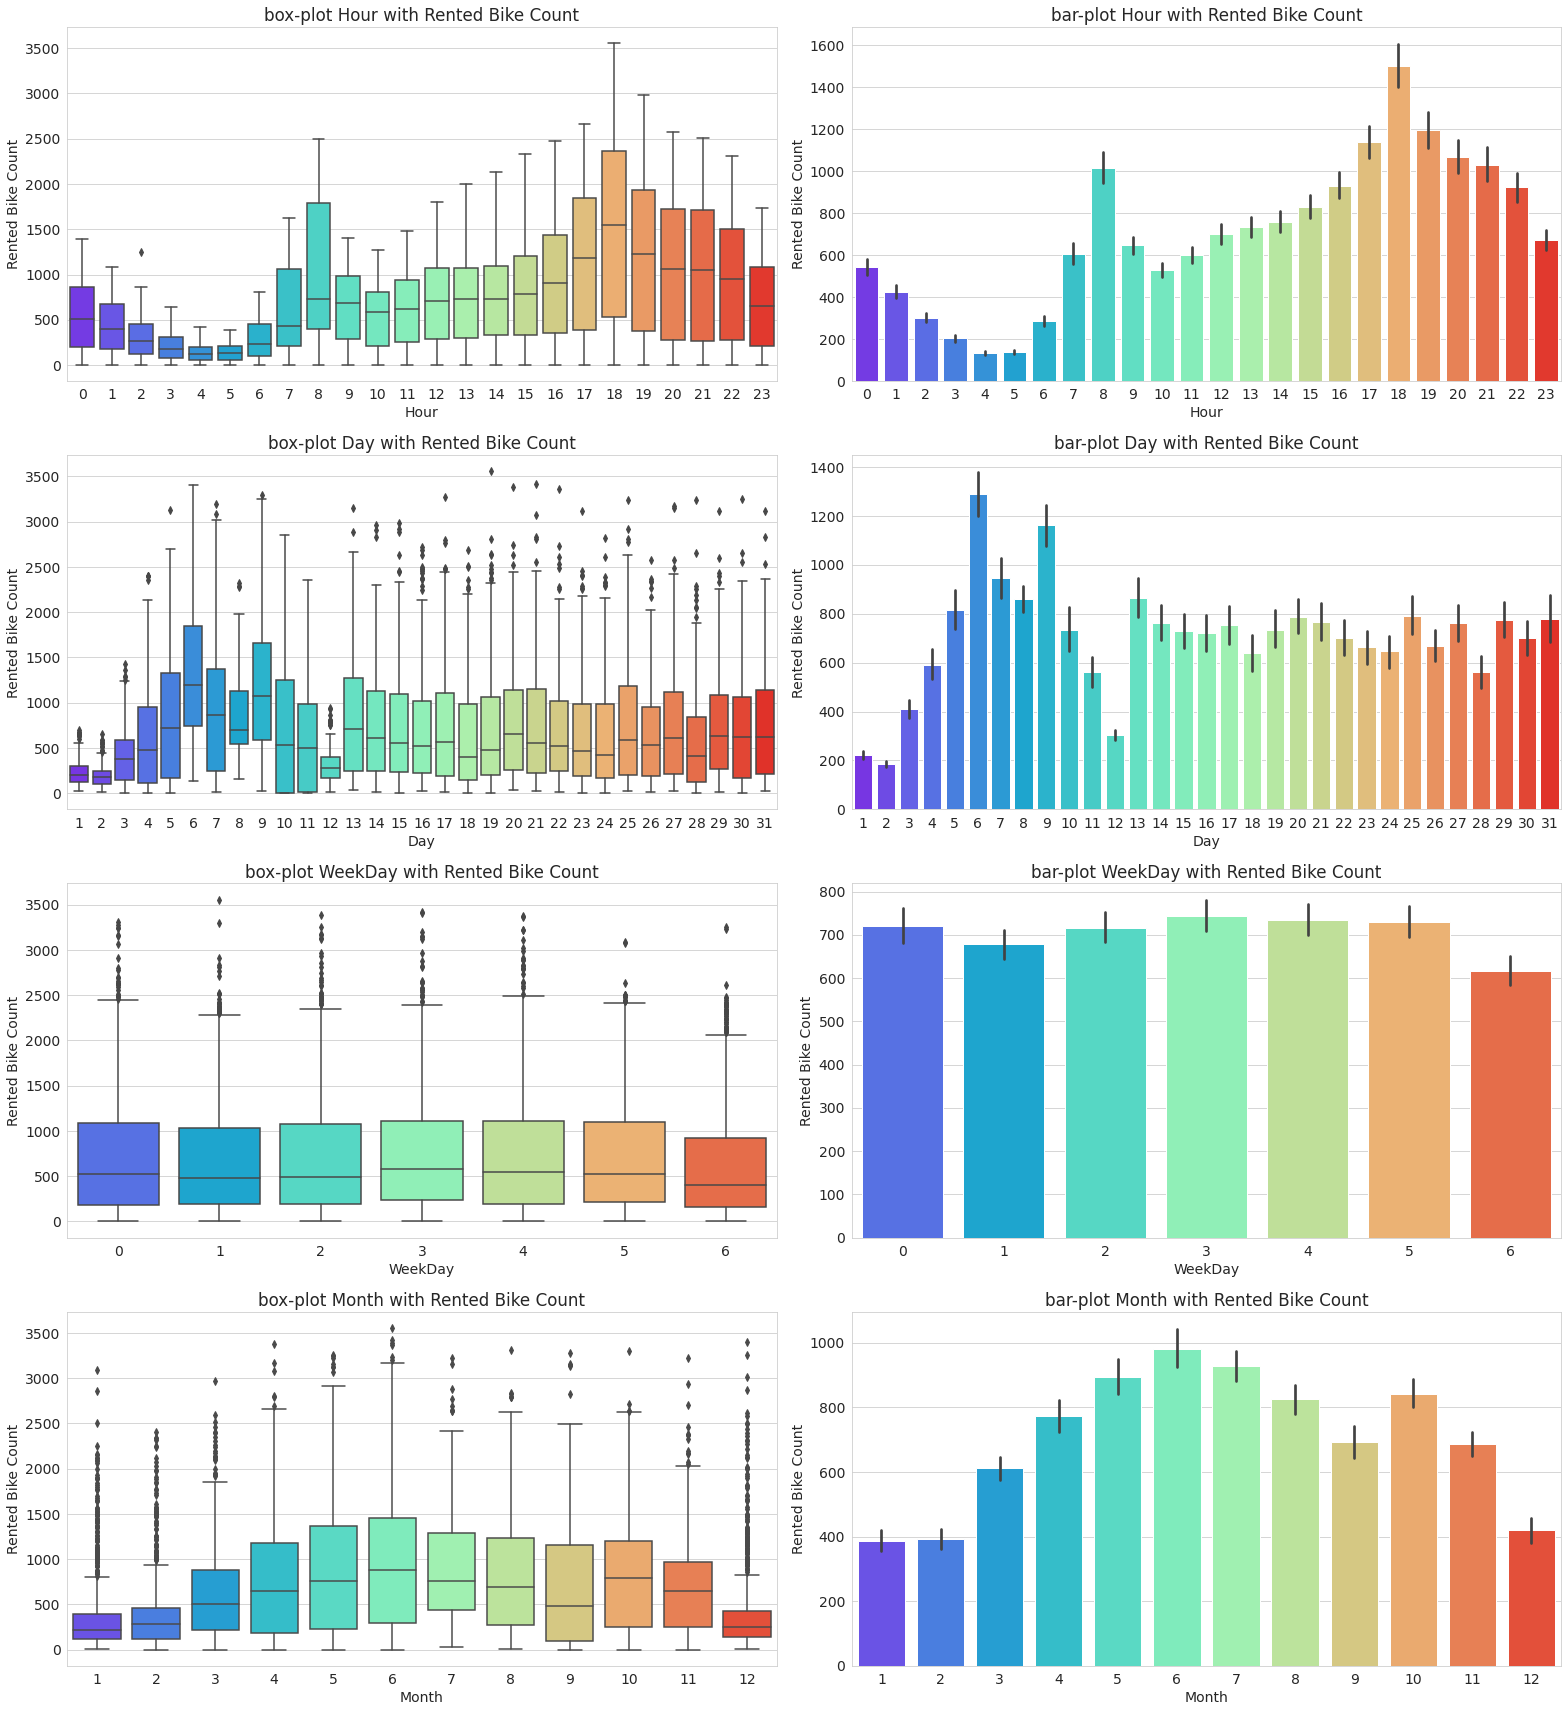

In [ ]:
# Creates a blanck canvas
fig, axes = plt.subplots(figsize=(22,24), nrows= 4, ncols= 2)

# categorical variable with more than 4 and less than 32 unique values
for ind, feature in enumerate(columns_with_uniqevals(5, 32)):
  sns.boxplot(data= df, x= feature, y= 'Rented Bike Count', palette= 'rainbow',
              ax= axes[ind , 0]).set_title(f"box-plot {feature} with Rented Bike Count")
              
  sns.barplot(data= df, x= feature, y= 'Rented Bike Count', palette= 'rainbow',
              ax= axes[ind , 1]).set_title(f"bar-plot {feature} with Rented Bike Count")

plt.tight_layout();

* Bike sharing is at its peak at 6pm and high between 4pm to 10pm, also at 8 am (may be due to office time) demand is also high.

* Bike sharing is least between 4am-6am.
* 1, 2 and 12 date is least preferred day and 6 and 9 is the most.
* June is the most preferred Month for bike sharing, july and May are the second best and least in December and January.
* Weekday have no impact on bike sharing count.


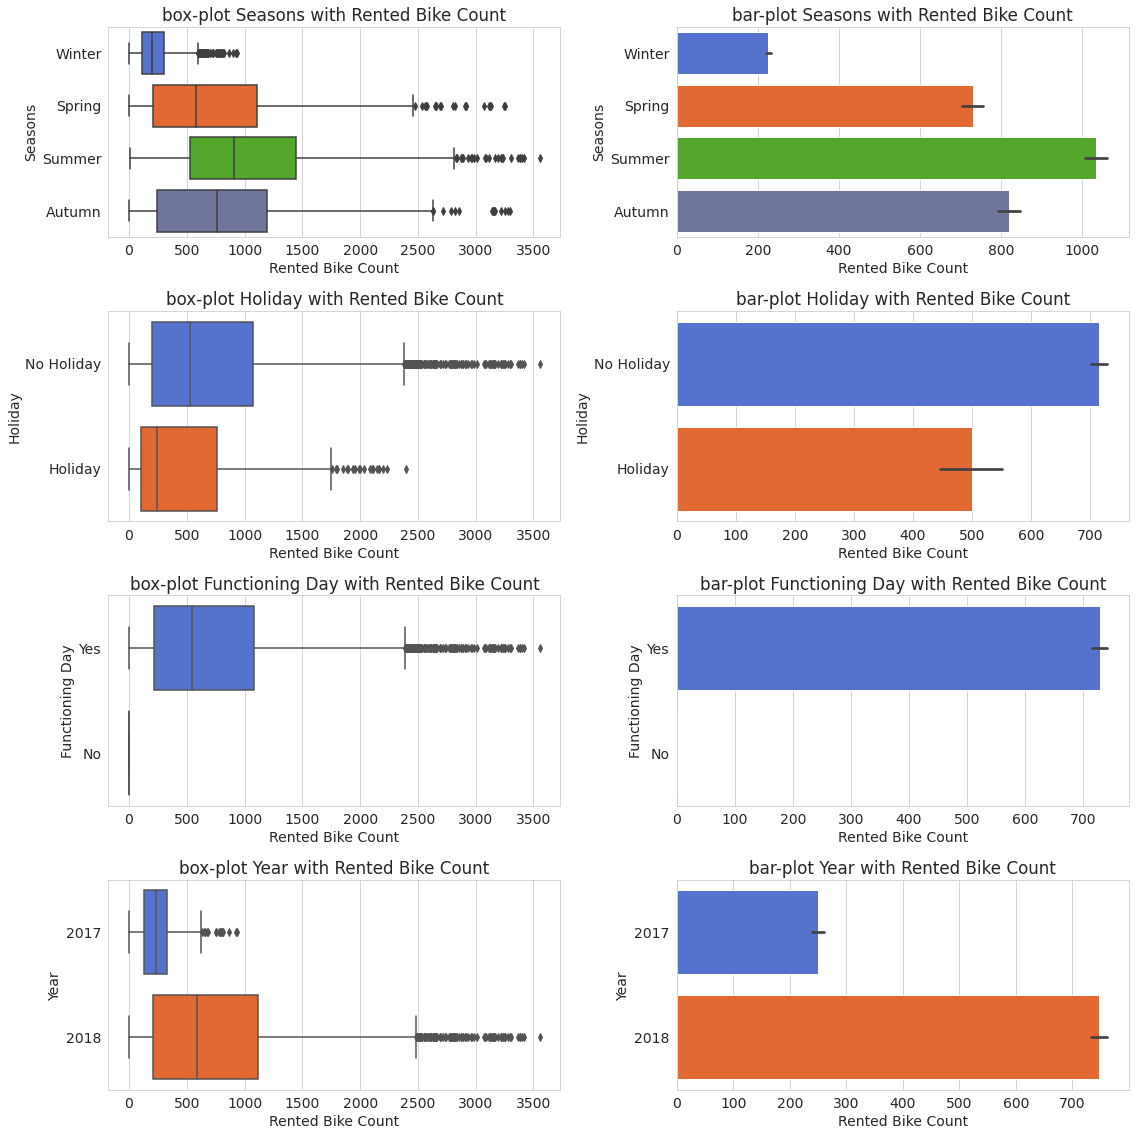

In [ ]:
# Creates a blanck canvas
fig, axes = plt.subplots(figsize=(16,16), nrows= 4, ncols= 2)

# categorical variable with less than 5 unique value 
features_cplot = [col for col in df.columns  if   len(df[col].unique()) < 5]

for ind, feature in enumerate(features_cplot):
  sns.boxplot(data= df, y= feature, x= 'Rented Bike Count', orient = 'h',
              ax= axes[ind , 0]).set_title(f"box-plot {feature} with Rented Bike Count")
  sns.barplot(data= df, y= feature, x= 'Rented Bike Count', orient = 'h',
              ax= axes[ind , 1]).set_title(f"bar-plot {feature} with Rented Bike Count")

plt.tight_layout();

  1. Summer is the most preferred season to rent a bike and winter is the least.
  2. People prefer to book bikes on working days rather than holidays.
  3. All bikes were hired on working day, Most of the customers are from the working class.
  4. People booked more bikes in 2018 than in 2017, the company may not be very popular in the year 2017.

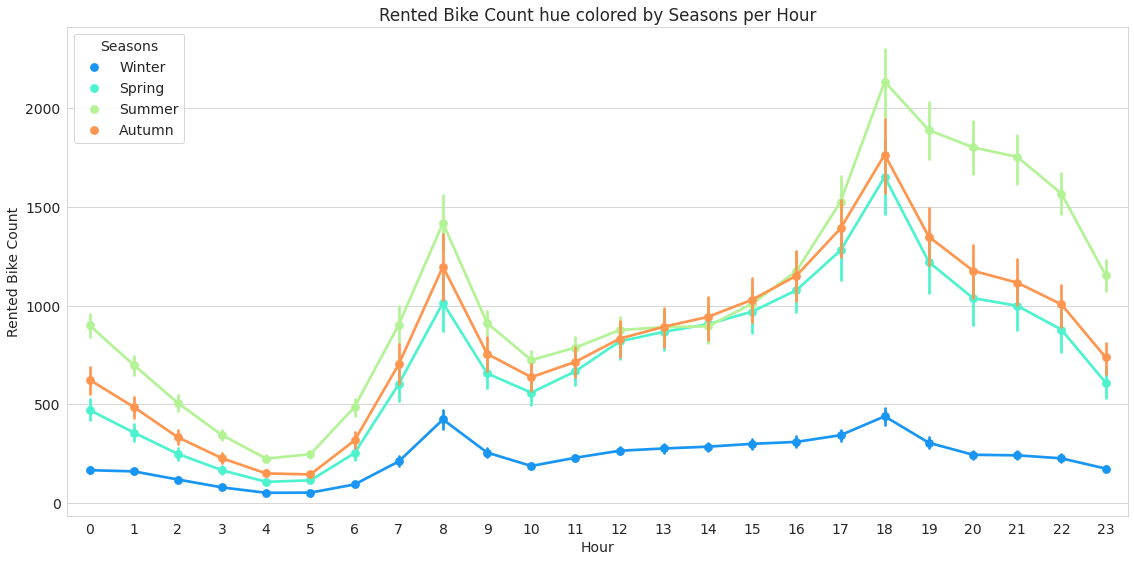

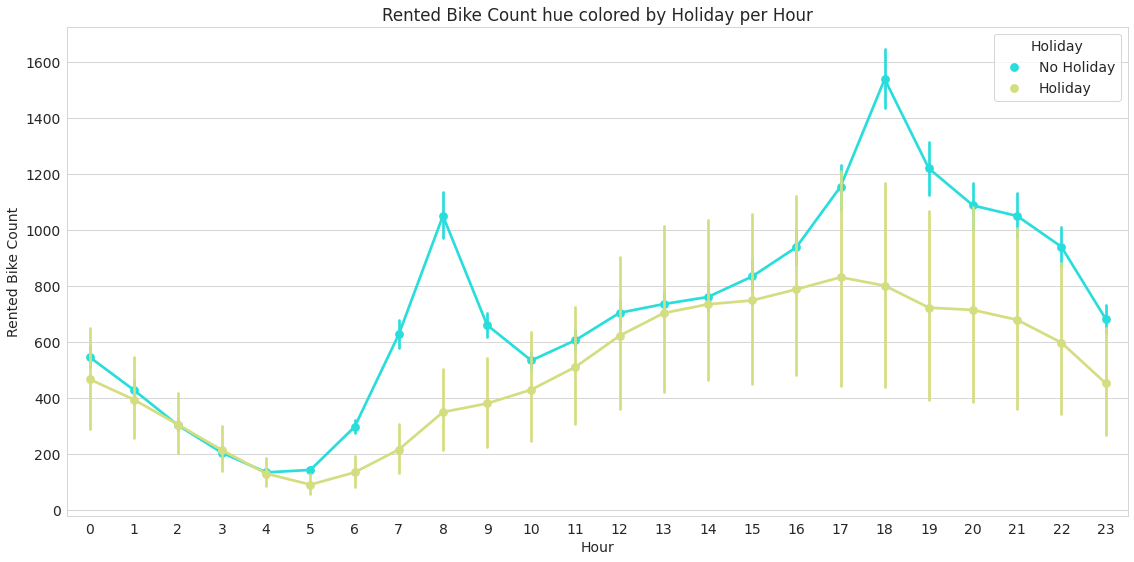

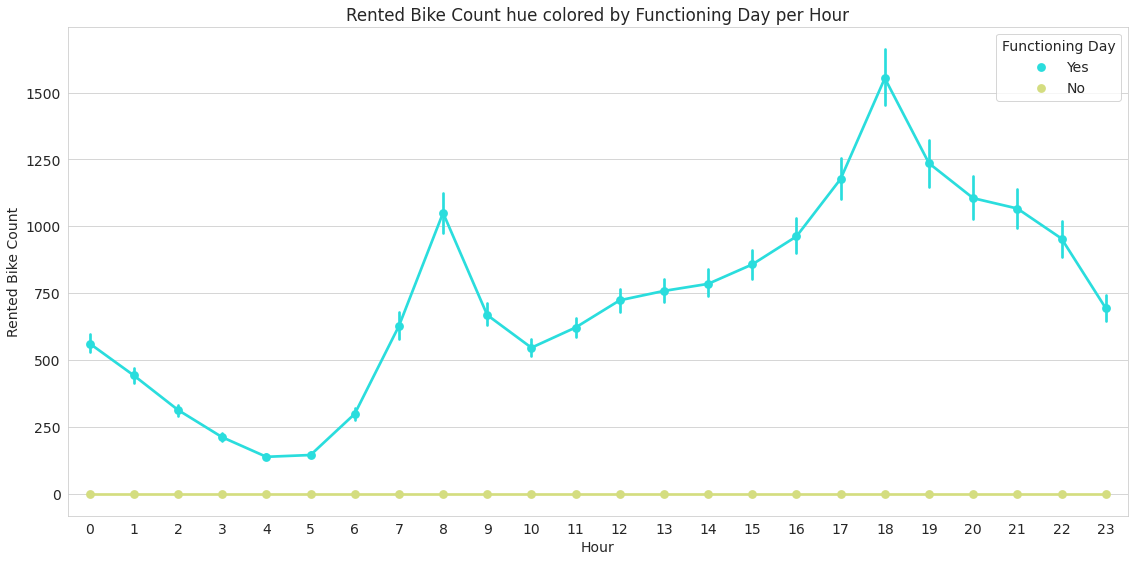

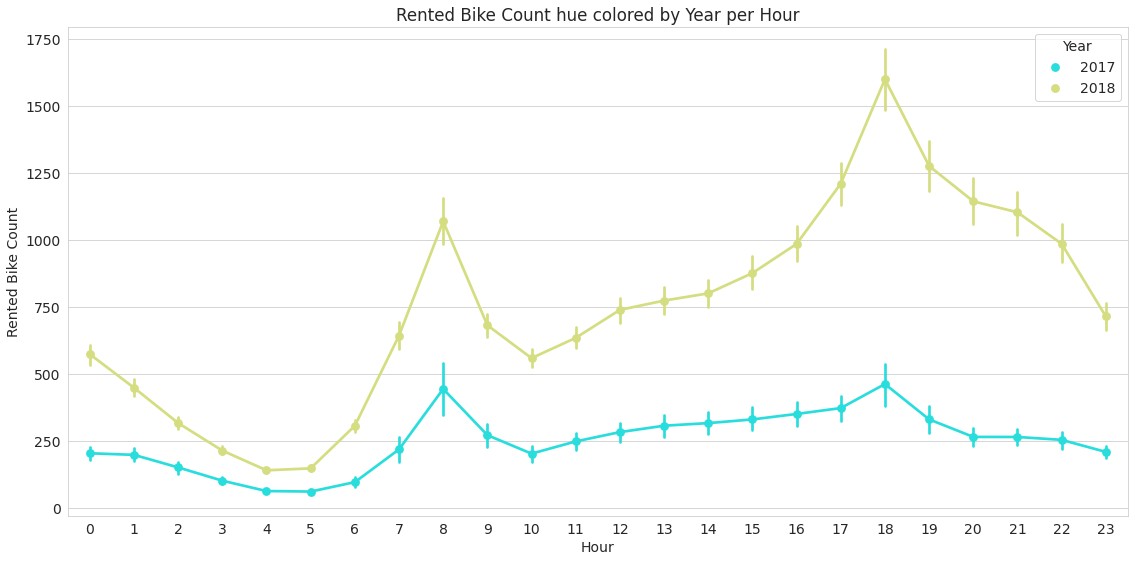

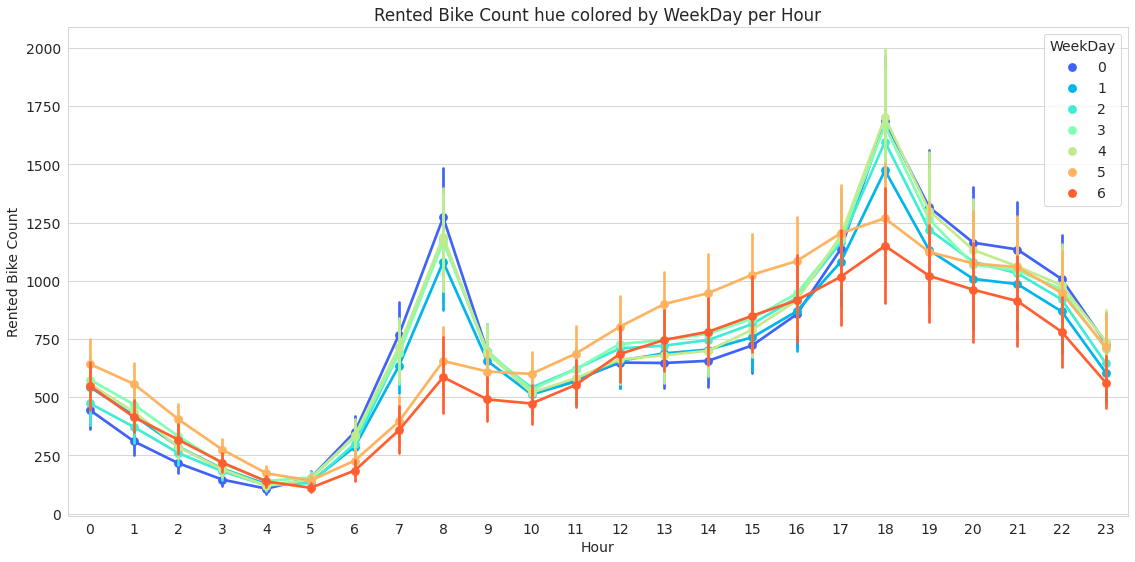

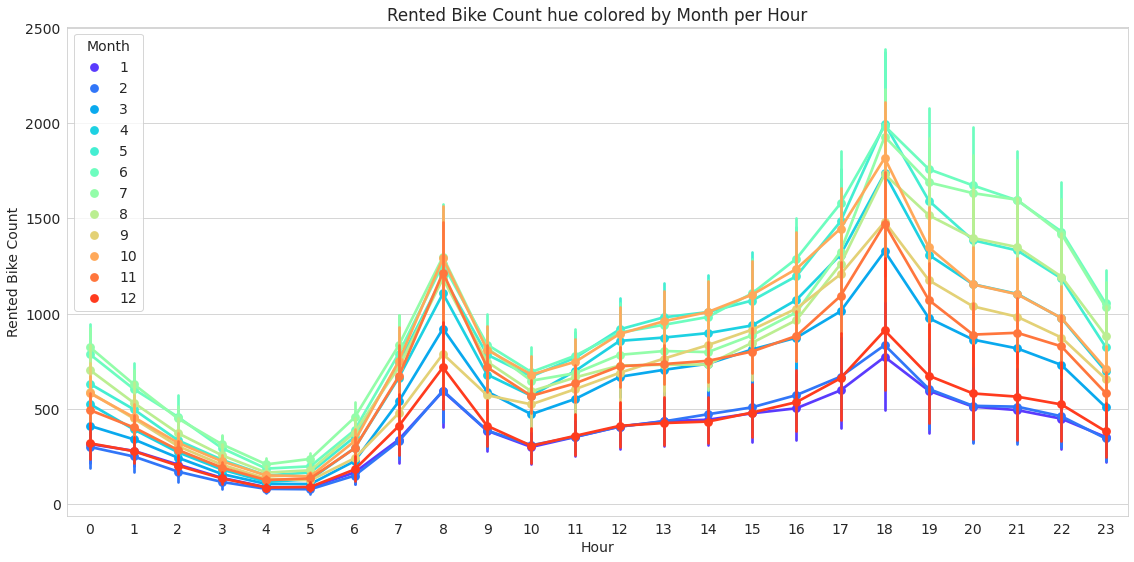

In [ ]:
# we create point plots with Rented Bike Count with some features with respect of Hour

# categorical variable with less than 5 unique value 
features_cplot = [col for col in df.columns  if  len(df[col].unique()) < 13]

for col in (features_cplot):
  plt.figure(figsize=(19,9))
  sns.pointplot(data= df, x= "Hour",y= 'Rented Bike Count',hue= col, palette= 'rainbow')
  plt.title(f"Rented Bike Count hue colored by {col} per Hour")
  plt.show();

>Season
* Demand is low in the winter season.

>Holiday
* Demand is low during holidays, but in no holidays the demand is high, it may be because people use bikes to go to their work.

>Functioning Day
* If there is no Functioning Day then there is no demand, The customers are from the working class

>Year
* The demand was less in 2017 and higher in 2018, it may be because it was new in 2017 and people did not know much about it.

>Month
* In the month column, We can clearly see that the demand is low in December January & Febuary, It is cold in these months and we have already seen in season column that demand is less in winters.

>Days of week
* In the Days of week column, We can observe from this column that the pattern of weekdays and weekends is different, in the weekend the demand becomes high in the afternoon. While the demand for office timings is high during weekdays, we can further change this column to weekdays and weekends.

----
**Regression plots of Rented Bike Count with numeric features**

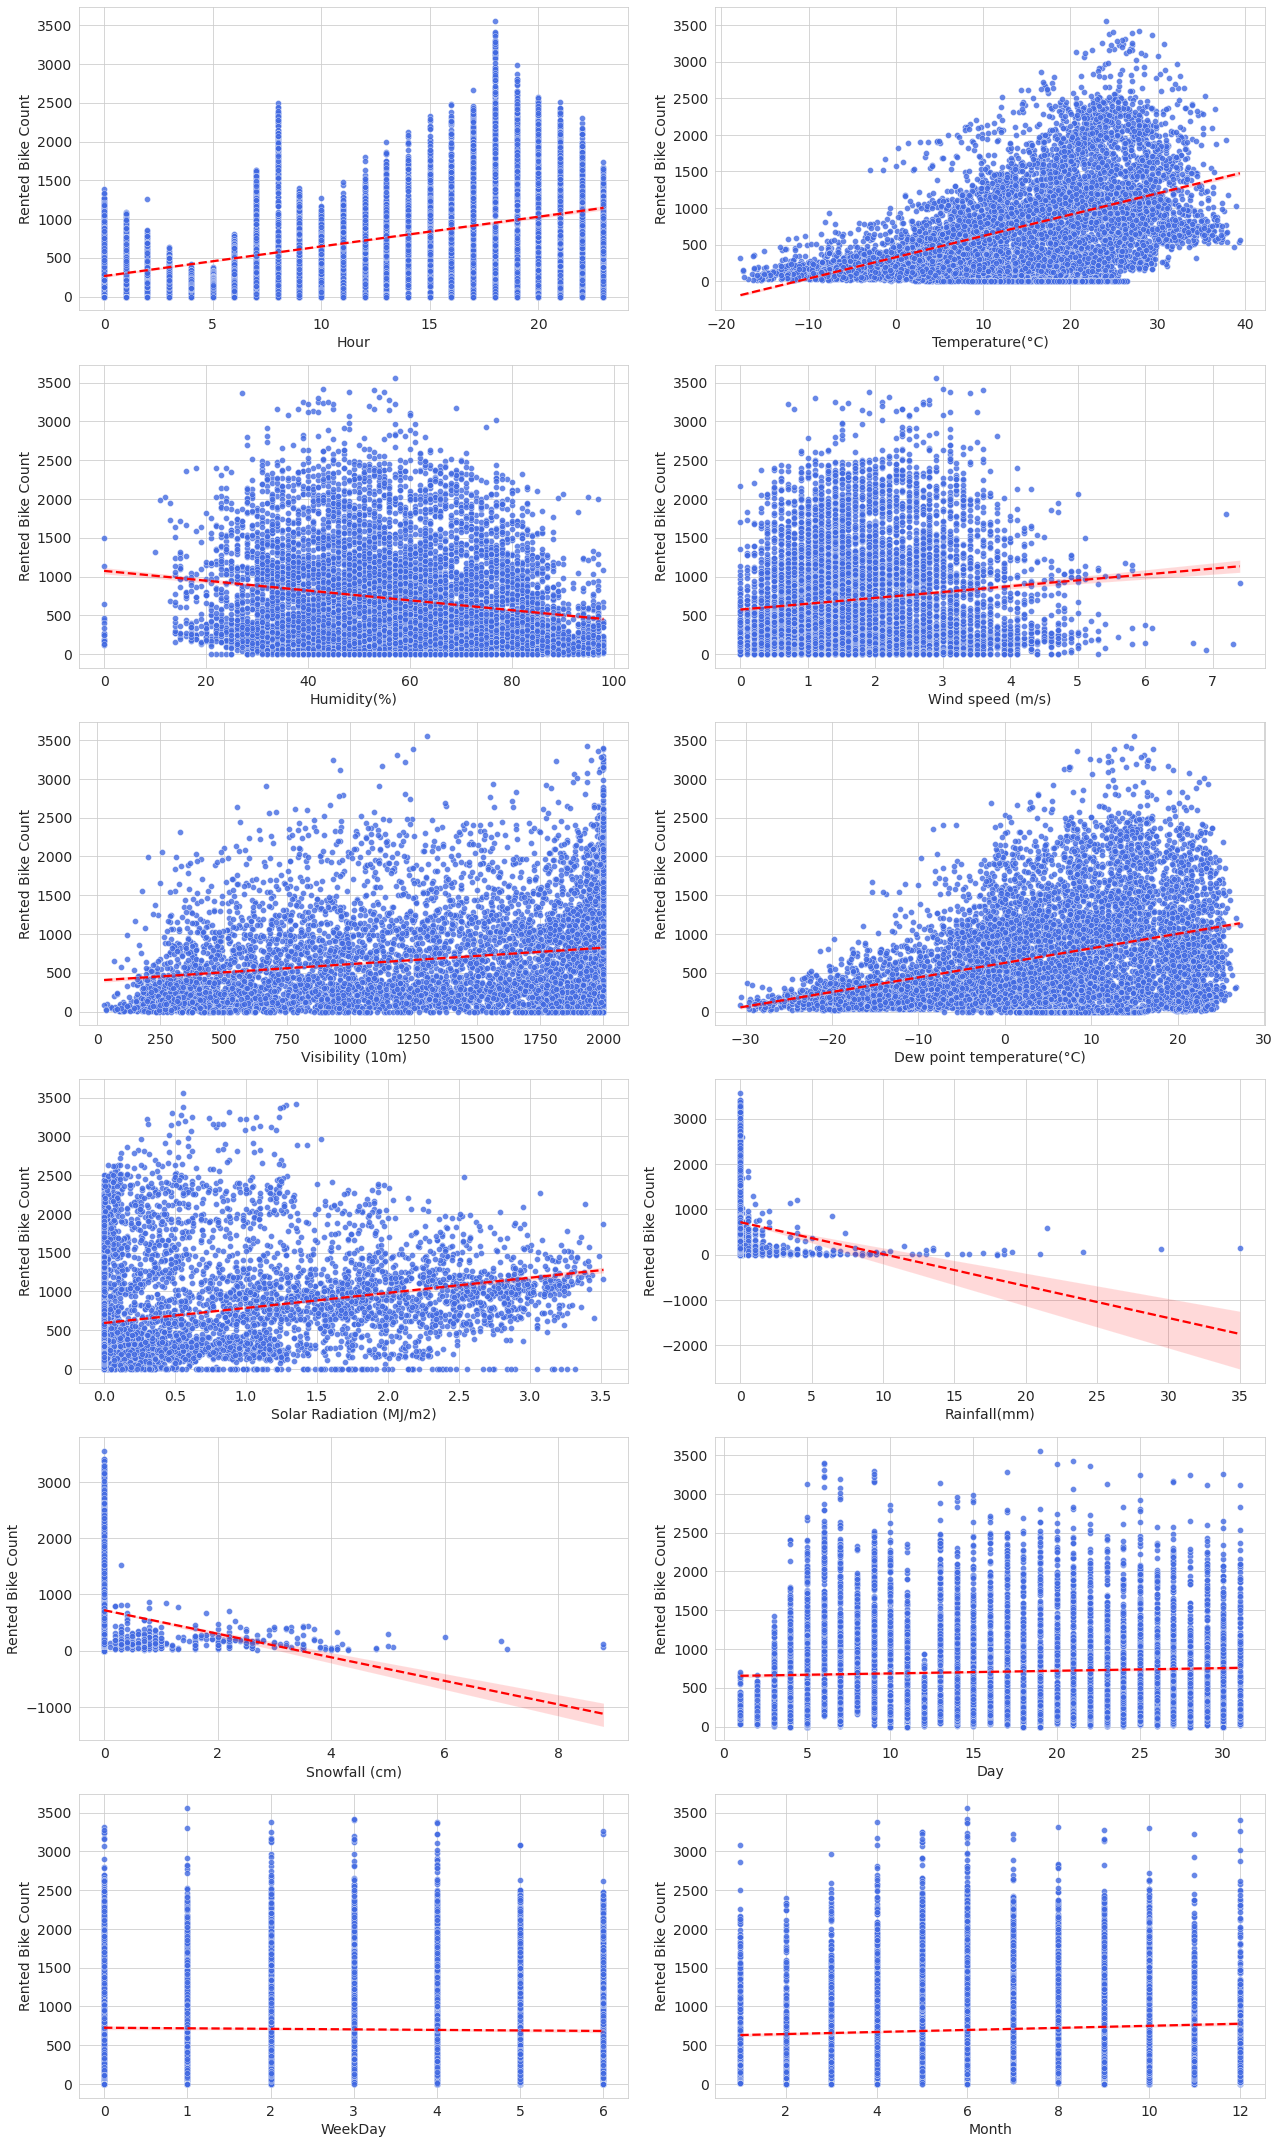

In [ ]:
def regression_plot(df):

  # Creates a blanck canvas
  fig, axes = plt.subplots(figsize=(18,30), nrows= 6, ncols= 2)

  # select independent feature, 'Rented Bike Count' is dependent feature
  nums_cols = [col for col in df_nums.columns if col not in ['Rented Bike Count']]

  for ind, feature in enumerate(nums_cols):
    ax = axes[ind // 2, ind % 2]
    # regression plot
    sns.regplot(data= df, x= feature, y= 'Rented Bike Count', ax= ax, 
                line_kws={"color": "red", 'ls': '--'},
                scatter_kws = {'linewidths': 0.4, 'edgecolors': 'white'})

  plt.tight_layout();

regression_plot(df)

We can match the trends in regression plot with correlation bar plot.

In [ ]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Year', 'Day', 'WeekDay', 'Month'],
      dtype='object')

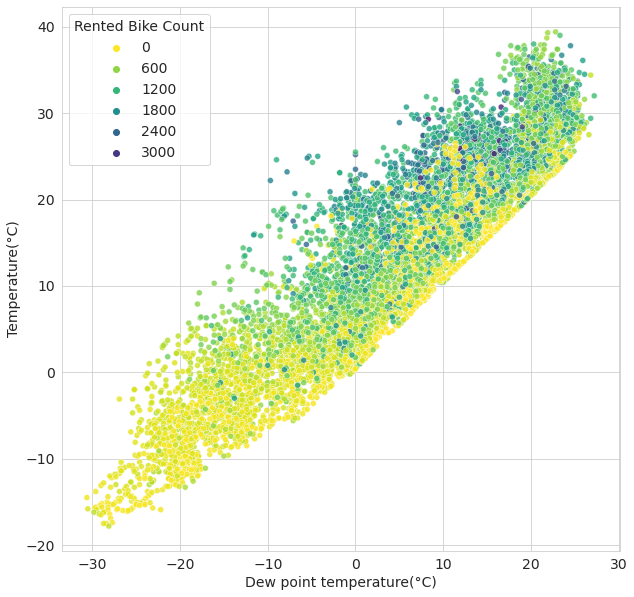

In [ ]:
# scatter plot for most corelated features
plt.figure(figsize= (10,10))
sns.scatterplot(data= df, x= 'Dew point temperature(°C)', y= 'Temperature(°C)', hue= 'Rented Bike Count', palette= 'viridis_r', alpha= 0.8);

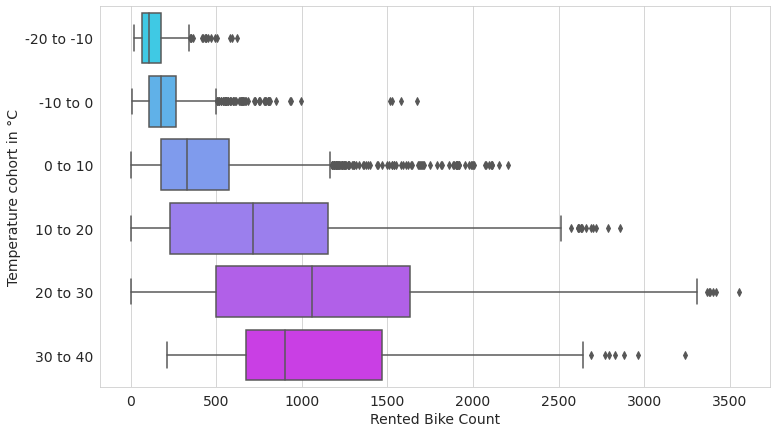

In [ ]:
# I divide temperature (most correlated numeric feature in broder cohort) 
df["Temperature cohort in °C"] = pd.cut(df["Temperature(°C)"], bins=[-20., -10., 0., 10., 20., 30., 40],              # max temperature is 39.40 and min is -17.8
                            labels=['-20 to -10', '-10 to 0', '0 to 10', '10 to 20', '20 to 30', '30 to 40'])

plt.figure(figsize= (12,7))
sns.boxplot(data= df, y= "Temperature cohort in °C", x= "Rented Bike Count", orient= 'h', palette= 'cool');

* We see that temperatures between **20 and 30 are most favorable** for renting, 30 to 40 in second and 10 to 20 in third.
People do not like to rent bikes in extreme cold.
And we've seen this pattern in this season's month as well.

In [ ]:
# dropping "Temperature cohort in °C" , since its part is done
df.drop("Temperature cohort in °C", axis= 1, inplace= True)

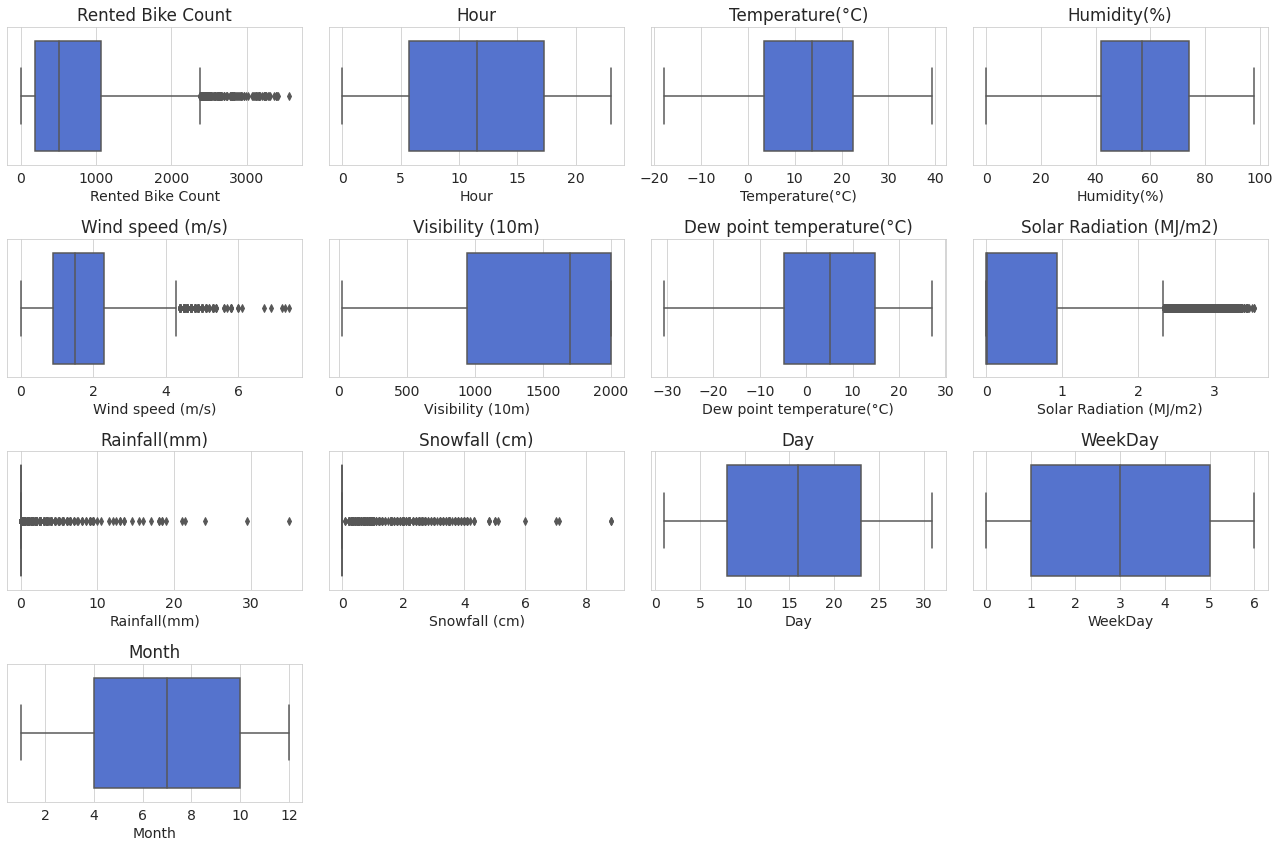

In [ ]:
# checking Outliers and skewness  with boxplot
def box_plot_features(df, cols):

  plt.figure(figsize=(18,12))

  for i, col in enumerate(cols):
    # nrows, ncols , index
    plt.subplot(4,4,i+1)
    # all points not inside 95 % confidence intervals are shows as outliers in box-plot
    sns.boxplot(data= df, x= col)
    plt.title(col)
    plt.tight_layout()

box_plot_features(df= df, cols= df_nums.columns)

In [ ]:
df_nums.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day',
       'WeekDay', 'Month'],
      dtype='object')

**Transformation of dependent variable to reduce its skewness**

In [ ]:
import scipy.stats as stats

from sklearn.preprocessing import FunctionTransformer, PowerTransformer

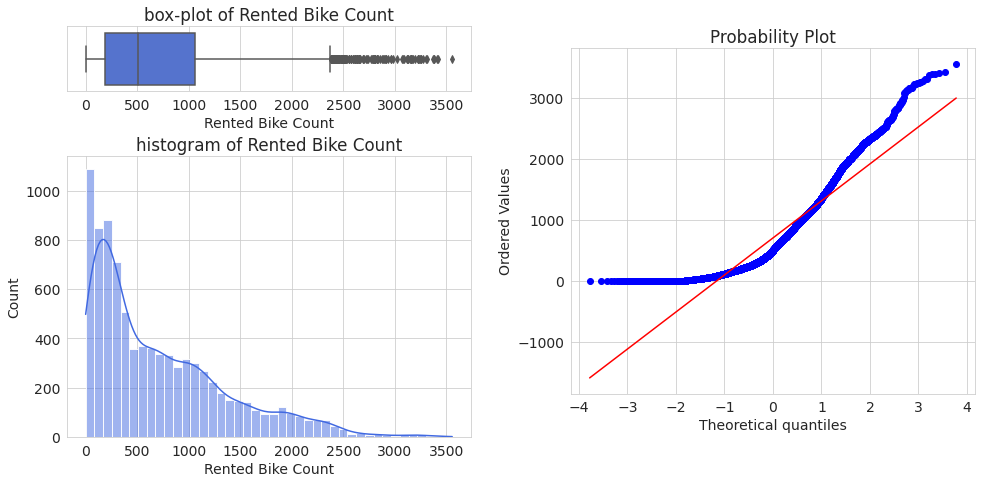

In [ ]:
def diagnostic_plots(series, title):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
      # craete a blank fig object
  fig = plt.figure(figsize=(7,6))

  # add all three axes ([left,bottom, width, height]) as argument
  ax0= fig.add_axes([0, 0, 0.8, 0.65])
  ax1= fig.add_axes([0, 0.80, 0.8, 0.15])
  ax2= fig.add_axes([1, 0.1, 0.8, 0.8])
  
  # hitogram
  sns.histplot( x= series, ax= ax0, kde= True).set_title(f"histogram of {title}")
  # box plot
  sns.boxplot( x= series,ax= ax1).set_title(f"box-plot of {title}")
  # Q-Q plot
  stats.probplot(series, dist="norm", plot= ax2)

  plt.tight_layout()
  plt.show()

diagnostic_plots(df['Rented Bike Count'], "Rented Bike Count")

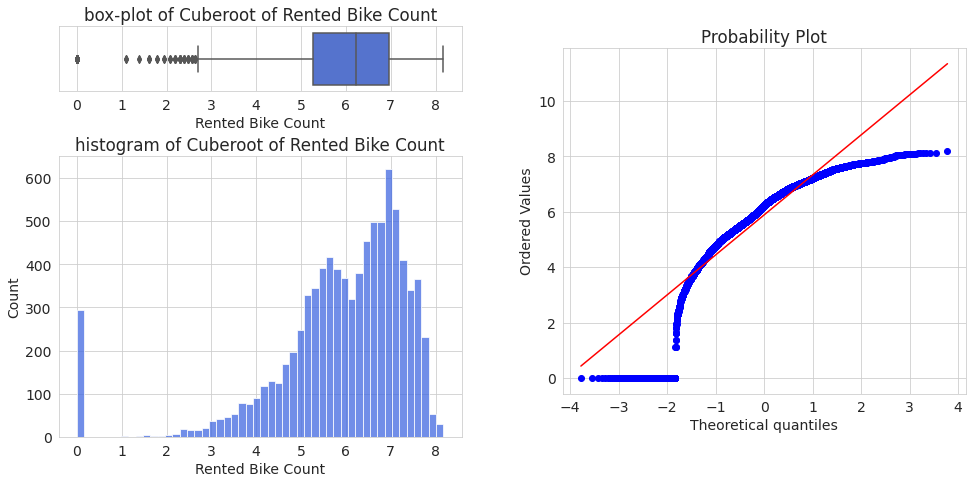

In [ ]:
# log transformation 
diagnostic_plots(np.log1p(df['Rented Bike Count']), "Log of Rented Bike Count")

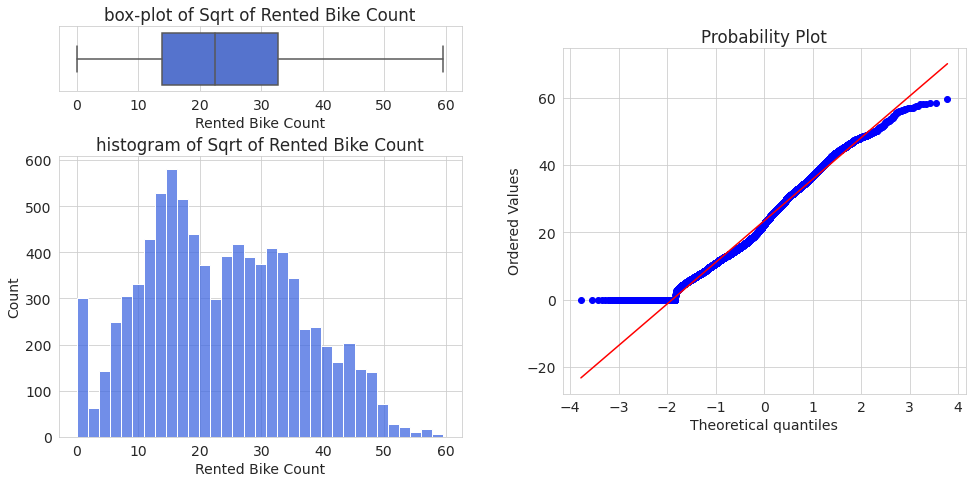

In [ ]:
# squareroot tranformnation
diagnostic_plots(np.sqrt(df['Rented Bike Count']), "Sqrt of Rented Bike Count")

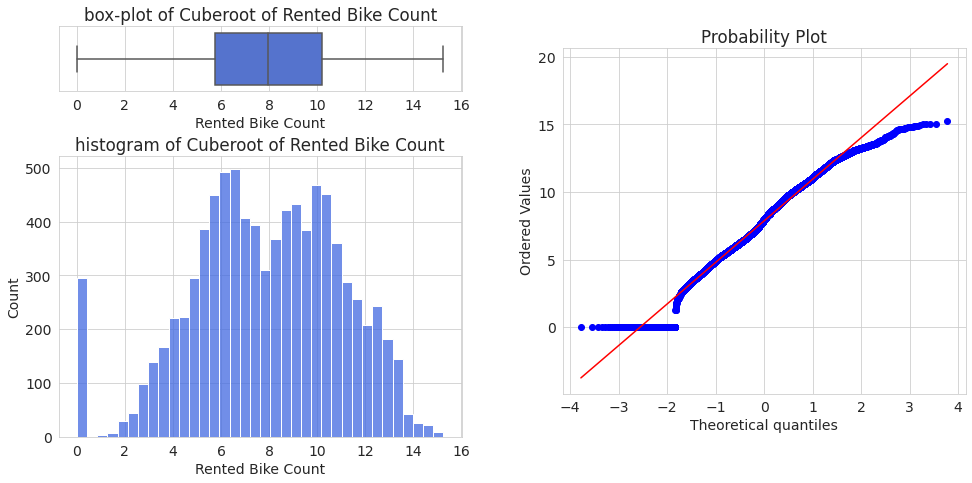

In [ ]:
# cuberoot transformation 
diagnostic_plots(np.cbrt(df['Rented Bike Count']), "Cuberoot of Rented Bike Count")

* From histogram and Q-Q plot, Sqrt and Cuberoot transformation graph is best that have no skewness.
* But by looking at box-plot , cubeeroot transformation is giving better performance.

Note -> There are other transformation techniques like Box-Cox transformation, Yeo-Johnson or other basic power transformation but here square root transform is working well so no more need to apply those advance transformation

# Prepare the Dataset for Training

**Stratified Shuffle split**

This technique consists of forcing the distribution of the target variable(s) among the different splits to be the same. This small change will result in training on the same population in which it is being evaluated, achieving better predictions.


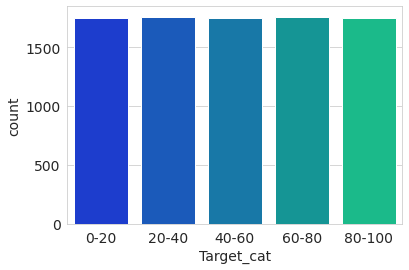

In [ ]:
# split target variable into 5 equal quantiles
df_final["Target_cat"] = pd.qcut(df_final["Rented Bike Count"], q= 5,
                            labels=['0-20', '20-40', '40-60', '60-80', '80-100'])

sns.countplot(data= df, x= df_final["Target_cat"], palette= 'winter');

In [ ]:
# StratifiedShuffleSplit is better than random train test split
# test size is 25 percent of overall data
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state= 42)

# Stratified split on "Target_cat", 25 percent of test data came from all quantiles in equal shear
# 0-20 percentile 75 % for train and 25 % for test 
# 20-40 percentile , 75% for train and 25% for test dataset ans so on 

# grab train and test index in  Stratified manner with respect to target variable
for train_index, test_index in split.split(df_final, df_final["Target_cat"]):
  strat_train_set = df_final.loc[train_index]
  strat_test_set = df_final.loc[test_index]

In [ ]:
# train and test data is splited in Stratified manner from all 
# target category is from all percentile in equal shear
strat_test_set["Target_cat"].value_counts() / len(strat_test_set)

20-40     0.200913
0-20      0.200000
60-80     0.200000
40-60     0.199543
80-100    0.199543
Name: Target_cat, dtype: float64

In [ ]:
# same with train data
# train data is comming from whole dataset
strat_train_set["Target_cat"].value_counts() / len(strat_train_set)

20-40     0.200761
60-80     0.200304
0-20      0.200000
80-100    0.199696
40-60     0.199239
Name: Target_cat, dtype: float64

In [ ]:
# Target cat is created only for statification lets drop it
# train data
X_train = strat_train_set.drop(['Target_cat', 'Rented Bike Count'], axis= 1)
y_train = np.cbrt(strat_train_set['Rented Bike Count'])  # cubrt transformation 

# test data
X_test =  strat_test_set.drop(['Target_cat', 'Rented Bike Count'], axis= 1)
y_test = np.cbrt(strat_test_set['Rented Bike Count'])  # cubrt transformation

In [ ]:
# MinMax scaling the data
scaler= MinMaxScaler()

# fit-transform on training data
scaled_X_train = scaler.fit_transform(X_train)
# only transform on test data to prevent data leakage 
scaled_X_test = scaler.transform(X_test)

# Applying Regression Models

In [ ]:
#  dictionary of models that we are going to use for this dataset
models_dict = {
    "Linear Regression" :           LinearRegression(),
    "Lasso Regression" :            Lasso(),
    "Ridge Regression" :            Ridge(),
    "Decision Tree Regressor" :     DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor" :     RandomForestRegressor(random_state=42),
    "Extra Tree Regressor" :        ExtraTreesRegressor(random_state=42),
    "Gradient Boosting Regressor" : GradientBoostingRegressor(random_state=42),
    "XGB Regressor" :               xgb.XGBRegressor(random_state=42),
    "Light-GBM" :                   lightgbm.LGBMRegressor(random_state=42),
    "LinearSVR" :                   LinearSVR()
}


def model_fit(train_X, test_X, train_y, test_y, models= models_dict):
  """
  return dictionary of each model performance.
  """

  # dictionary that we want to return
  models_data = {
      'Name': [],                   # Name of that model
      'time_taken': [],      # time taken in training, predicting and calulation of errors
      'train_RMSE': [],             # root mean square error of training set
      'train_MAE': [],              # mean square error
      'train_R2_Score': [],         # accuracy of testing set
      'test_RMSE' : [],             # 
      'test_MAE' : [],
      'test_R2_Score' : [],
      'trained_model': []           # trained (fitted) model on training data 
  }

  # models argument in this function is dictionary of ML models with their names 
  for model_name, model_type in models.items():
    
    print(f"We are at {model_name}")

    models_data["Name"].append(model_name)

    # statring time
    tic = time.time() 
  
    # fit on train data
    model_type.fit(train_X, train_y)
    
    models_data['trained_model'].append(model_type)

    # Training set, first perdict then calculate MAE, RMSE, R2_Score 
    train_y_pred = model_type.predict(train_X)
    train_MAE = mean_absolute_error(train_y, train_y_pred)
    train_RMSE = np.sqrt(mean_squared_error(train_y, train_y_pred))
    train_R2_score = r2_score(train_y, train_y_pred)

    models_data["train_MAE"].append(train_MAE)
    models_data["train_RMSE"].append(train_RMSE)
    models_data["train_R2_Score"].append(train_R2_score)

    # Test set
    test_y_pred = model_type.predict(test_X)
    test_MAE = mean_absolute_error(test_y, test_y_pred)
    test_RMSE = np.sqrt(mean_squared_error(test_y, test_y_pred))
    test_R2_score = r2_score(test_y, test_y_pred)

    models_data["test_MAE"].append(test_MAE)
    models_data["test_RMSE"].append(test_RMSE)
    models_data["test_R2_Score"].append(test_R2_score)

    #end time
    tac = time.time()

    models_data["time_taken"].append(tac - tic)

    # loop ended

  return models_data

In [ ]:
models_dict = model_fit(scaled_X_train, scaled_X_test, y_train, y_test)

We are at Linear Regression
We are at Lasso Regression
We are at Ridge Regression
We are at Decision Tree Regressor
We are at Random Forest Regressor
We are at Extra Tree Regressor
We are at Gradient Boosting Regressor
We are at XGB Regressor
[16:08:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
We are at Light-GBM
We are at LinearSVR


In [ ]:
# creating a dataframe from that dictionary and sort on the basis of test accuracy
performance_df = pd.DataFrame(models_dict).sort_values(by= 'test_RMSE') 
performance_df

Name  time_taken    train_RMSE     train_MAE  \
5         Extra Tree Regressor    2.576441  1.153460e-14  9.317323e-15   
8                    Light-GBM    0.279818  5.651895e-01  3.891174e-01   
4      Random Forest Regressor    4.232877  3.072379e-01  2.013513e-01   
7                XGB Regressor    0.486552  9.583764e-01  6.886350e-01   
6  Gradient Boosting Regressor    1.129408  9.550174e-01  6.846843e-01   
3      Decision Tree Regressor    0.140977  0.000000e+00  0.000000e+00   
0            Linear Regression    0.014979  1.687002e+00  1.287042e+00   
2             Ridge Regression    0.009226  1.688379e+00  1.290829e+00   
9                    LinearSVR    0.036271  1.701014e+00  1.281510e+00   
1             Lasso Regression    0.009165  3.086953e+00  2.533599e+00   

   train_R2_Score  test_RMSE  test_MAE  test_R2_Score  \
5        1.000000   0.736605  0.472264       0.945352   
8        0.966478   0.746100  0.492607       0.943934   
4        0.990094   0.786386  0.512456       0.937716   
7        0.903614   0.989713  0.712458       0.901344   
6        0.904289   0.991557  0.708131       0.900976   
3        1.000000   1.058769  0.684609       0.887097   
0        0.701344   1.687797  1.283247       0.713090   
2        0.700856   1.691093  1.288344       0.711969   
9        0.696362   1.711421  1.289069       0.705002   
1        0.000000   3.151104  2.574546      -0.000070   

                                       trained_model  
5  (ExtraTreeRegressor(random_state=1608637542), ...  
8                     LGBMRegressor(random_state=42)  
4  (DecisionTreeRegressor(max_features='auto', ra...  
7                      XGBRegressor(random_state=42)  
6  ([DecisionTreeRegressor(criterion='friedman_ms...  
3             DecisionTreeRegressor(random_state=42)  
0                                 LinearRegression()  
2                                            Ridge()  
9                                        LinearSVR()  
1                                            Lasso()

## Hyperparameter Tuning

In [ ]:
# Custom Function for Performance Metrics
def model_performance(reg_model, train_X= scaled_X_train, test_X= scaled_X_test, 
                      train_y=  y_train, test_y= y_test):
  """
  print performance metrics of regression model like MAE, RMSE, R2_score 
  """

  for (label, X, y) in [('training',train_X, train_y), ('testing',test_X, test_y)]:

    y_pred = reg_model.predict(X)
    MAE = mean_absolute_error(y, y_pred)
    RMSE = np.sqrt(mean_squared_error(y, y_pred))
    R2_score = r2_score(y, y_pred)

    n = X.shape[0]  # no of observation
    k = X.shape[1]  # no of independent variable
    adj_R2 = 1 - ((n - 1) * (1 - R2_score) / (n - k - 1))

    print("_" * 120)
    print(f"For {label} data", end= "\n"*2)
    print('Mean value of sqrt of Rented Bike Count', y.mean())
    print('Mean Absolute Error (MAE): ', MAE)
    print('Root Mean Squared Error (RMSE): ', RMSE)
    print('R2 Score is: ', R2_score)
    print('Adjusted R2 Score is: ', adj_R2)

In [ ]:
def hyperparameter_tuning(reg_model, param_grid, train_X= scaled_X_train, 
                          test_X= scaled_X_test, train_y= y_train, test_y= y_test):
  """
  Take model and its hyperparameters as input and return best fitted model
  """

  #  Grid Search object
  grid_search = GridSearchCV(
          estimator= reg_model,
          param_grid= param_grid,
          scoring= 'r2',
          cv= 3,
          n_jobs= -1,
          verbose= 1
  )

  # Strat
  tic = time.time()

  # fit on grid search
  grid_search.fit(train_X, train_y)

  # End
  tac = time.time()

  print(f"Time taken in hyper-parameter tuning : {round(tac-tic, 2)} sec")   
  print(120 * '_', end= '\n' * 2)

  print("Best Parameters are")
  for key, val in  grid_search.best_params_.items():
    print(f"{key} : {val}")
  
  print(120 * '_', end= '\n' * 2)
  # calculate accuracy with test data
  r2 = grid_search.score(test_X, test_y)
  
  print(f"Best R2 Score is {r2}")

  return grid_search

In [ ]:
extree = ExtraTreesRegressor(random_state=42) 

# Create the a grid parameter
extree_grid ={'bootstrap': [True, False],
              'max_depth': [30, 50, 70, None],
              'n_estimators': [100, 500, 1000],
              'oob_score': [False, True]}


extree_grid_model = hyperparameter_tuning(extree, extree_grid) # take 12 minutes

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Time taken in hyper-parameter tuning : 597.28 sec
________________________________________________________________________________________________________________________

Best Parameters are
bootstrap : False
max_depth : 50
n_estimators : 1000
oob_score : False
________________________________________________________________________________________________________________________

Best R2 Score is 0.9459500141050307


In [ ]:
# performance metrics of ExtraTreesRegressor after hyperparameter tuning
model_performance(extree_grid_model.best_estimator_)

________________________________________________________________________________________________________________________
For training data

Mean value of sqrt of Rented Bike Count 7.873333638463095
Mean Absolute Error (MAE):  9.068920145544691e-14
Root Mean Squared Error (RMSE):  1.1214047490214216e-13
R2 Score is:  1.0
Adjusted R2 Score is:  1.0
________________________________________________________________________________________________________________________
For testing data

Mean value of sqrt of Rented Bike Count 7.847037417503007
Mean Absolute Error (MAE):  0.4699271185143383
Root Mean Squared Error (RMSE):  0.7325637862896524
R2 Score is:  0.9459500141050307
Adjusted R2 Score is:  0.9455018797217467


after tuning R2 score become 0.9459 from 0.9439.

In [ ]:
lgbm = LGBMRegressor(random_state=42)

# Create the a grid parameter
lgbm_grid ={'bootstrap': [True, False],
              'max_depth': [20, 30, 50, None],
              'n_estimators': [100, 800, 1500, 1800],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5]}

lgbm_grid_model = hyperparameter_tuning(lgbm, lgbm_grid) # take 12 to 13 min

Fitting 3 folds for each of 192 candidates, totalling 576 fits
Time taken in hyper-parameter tuning : 756.4 sec
________________________________________________________________________________________________________________________

Best Parameters are
bootstrap : True
max_depth : 20
min_samples_leaf : 1
min_samples_split : 2
n_estimators : 1800
________________________________________________________________________________________________________________________

Best R2 Score is 0.9554809721156663


In [ ]:
lgbm_grid_model.best_estimator_

LGBMRegressor(bootstrap=True, max_depth=20, min_samples_leaf=1,
              min_samples_split=2, n_estimators=1800, random_state=42)

In [ ]:
# performance metrics of LGBMRegressor after hyperparameter tuning
model_performance(lgbm_grid_model.best_estimator_)

________________________________________________________________________________________________________________________
For training data

Mean value of sqrt of Rented Bike Count 7.873333638463095
Mean Absolute Error (MAE):  0.04978885764804702
Root Mean Squared Error (RMSE):  0.07384258506945418
R2 Score is:  0.9994277923971476
Adjusted R2 Score is:  0.9994262201582755
________________________________________________________________________________________________________________________
For testing data

Mean value of sqrt of Rented Bike Count 7.847037417503007
Mean Absolute Error (MAE):  0.4245543637564833
Root Mean Squared Error (RMSE):  0.6648451265598344
R2 Score is:  0.9554809721156663
Adjusted R2 Score is:  0.955111859954488


After hyperparameter tunning R2 score increased from 0.9439 to 0.9555.

Is 1.78 MAE, 2.74 RMSE is good score ? Lets compare to overall mean.

In [ ]:
ytest_mean =  y_test.mean()

rmse_percent = 100 * 2.74 / ytest_mean
mae_percent = 100 * 1.78 / ytest_mean

# dependeent variable is sqrt of bike rent count
print(f"Mean value of dependent variable : {ytest_mean : .2f}")
print(f"RMSE is : {2.74} which is {rmse_percent: .2f} % of over all mean of test data.")
print(f"MAE is : {1.78} which is {mae_percent: .2f} % of over all mean of test data.")

Mean value of dependent variable :  7.85
RMSE is : 2.74 which is  34.92 % of over all mean of test data.
MAE is : 1.78 which is  22.68 % of over all mean of test data.


# Feature importance

Feature importance refers to technique that assigns a score to features based on how significant they are at predicting a target variable

In [ ]:
# with best estimator
final_model = LGBMRegressor(bootstrap=True, max_depth=30, min_samples_leaf=1,
              min_samples_split=2, n_estimators=1500, random_state=42)

final_model.fit(scaled_X_train , y_train)

LGBMRegressor(bootstrap=True, max_depth=30, min_samples_leaf=1,
              min_samples_split=2, n_estimators=1500, random_state=42)

In [ ]:
# Important features or coefficient of the model
final_model.feature_importances_

array([4738, 5755, 4757, 4438, 6044, 5438, 3981,  659,  255, 3453, 2371,
       2191,  305,  154,  111,  172,   96,   82])

In [ ]:
# creating a dataframe for feature importance, sorted from most to least important features
importance_df = pd.DataFrame(index= X_train.columns, data= final_model.feature_importances_,
                             columns=['Importance']).sort_values("Importance", ascending= False)

importance_df

Importance
Visibility (10m)                 6044
Temperature(°C)                  5755
Dew point temperature(°C)        5438
Humidity(%)                      4757
Hour                             4738
Wind speed (m/s)                 4438
Solar Radiation (MJ/m2)          3981
Day                              3453
WeekDay                          2371
Month                            2191
Rainfall(mm)                      659
Seasons_Spring                    305
Snowfall (cm)                     255
Holiday_No Holiday                172
Seasons_Summer                    154
Seasons_Winter                    111
Functioning Day_Yes                96
Year_2018                          82

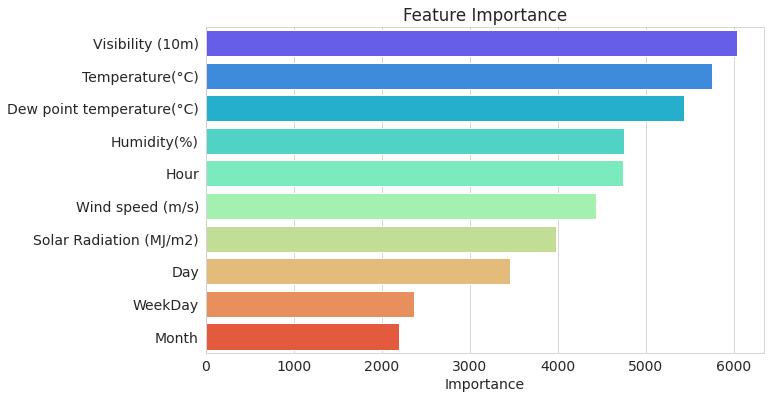

In [ ]:
# Bar plot of Top 10 impartant features
plt.figure(figsize=(10,6))
sns.barplot(data= importance_df[:10], y= importance_df[:10].index, x='Importance', palette= 'rainbow')
plt.title('Feature Importance');

## **Residual Analysis**
The residual for each observation is the difference between predicted values of y (dependent variable) and observed values of y
$$ Residual = actual \;y\; value − predicted \;y\; value$$ 
$$\epsilon_i = y_i − \hat{y_i}$$
Having a negative residual means that the predicted value is too high, similarly if you have a positive residual it means that the predicted value was too low. The aim of a regression line is to minimise the sum of residuals.

* First I analyse the residuals with squareroot of Bike rented count.
* Then with the Bike rented count.



In [ ]:
# predicted values
y_hat = final_model.predict(scaled_X_test)


In [ ]:
# squaring the prediction and actual count
actual_count = (y_test.values)**3
pred_count = (y_hat) ** 3

# datafeame for actual and predicted values for test data
df_residual = pd.DataFrame({
    'Cbrt Actual Bike Rented': y_test.values,
    'Cbrt Predicted Bike Rented': y_hat,
    'residual Cbrt Bike Rented': (y_test.values - y_hat), 
    'abslute residual Cbrt Bike Rented':abs(y_test.values - y_hat) ,
    'Actual Bike Rented': actual_count,
    'Predicted Bike Rented' :  pred_count,
    'residual Bike Rented' : (actual_count - pred_count),
    'abslute residual Bike Rented' : abs(actual_count - pred_count)
})

In [ ]:
df_residual.head()

Cbrt Actual Bike Rented  Cbrt Predicted Bike Rented  \
0                 3.448217                    3.021009   
1                10.531275                   10.637965   
2                 8.879040                    8.765709   
3                 2.802039                    3.522937   
4                 7.758402                    7.659468   

   residual Cbrt Bike Rented  abslute residual Cbrt Bike Rented  \
0                   0.427208                           0.427208   
1                  -0.106690                           0.106690   
2                   0.113331                           0.113331   
3                  -0.720898                           0.720898   
4                   0.098935                           0.098935   

   Actual Bike Rented  Predicted Bike Rented  residual Bike Rented  \
0                41.0              27.571229             13.428771   
1              1168.0            1203.859127            -35.859127   
2               700.0             673.536559             26.463441   
3                22.0              43.723481            -21.723481   
4               467.0             449.361379             17.638621   

   abslute residual Bike Rented  
0                     13.428771  
1                     35.859127  
2                     26.463441  
3                     21.723481  
4                     17.638621

In [ ]:
# statistical summary of residual dataframe , above four are for sqrt transformation and below 4 rows for actual bike count
df_residual.describe().T

count        mean         std  \
Cbrt Actual Bike Rented            2190.0    7.847037    3.151714   
Cbrt Predicted Bike Rented         2190.0    7.853715    3.077915   
residual Cbrt Bike Rented          2190.0   -0.006678    0.665826   
abslute residual Cbrt Bike Rented  2190.0    0.424783    0.512685   
Actual Bike Rented                 2190.0  706.022374  649.382955   
Predicted Bike Rented              2190.0  696.366975  623.568983   
residual Bike Rented               2190.0    9.655399  162.544610   
abslute residual Bike Rented       2190.0   90.425398  135.401372   

                                            min         25%         50%  \
Cbrt Actual Bike Rented            0.000000e+00    5.798890    8.036290   
Cbrt Predicted Bike Rented        -1.033046e+00    5.828888    7.936117   
residual Cbrt Bike Rented         -5.209029e+00   -0.259612    0.016584   
abslute residual Cbrt Bike Rented  1.432186e-04    0.122319    0.265597   
Actual Bike Rented                 0.000000e+00  195.000000  519.000000   
Predicted Bike Rented             -1.102451e+00  198.042192  499.832515   
residual Bike Rented              -1.379534e+03  -37.041393    0.587383   
abslute residual Bike Rented       9.121627e-07   15.954734   43.515428   

                                           75%          max  
Cbrt Actual Bike Rented              10.189712    15.263492  
Cbrt Predicted Bike Rented           10.212739    14.664430  
residual Cbrt Bike Rented             0.275587     5.146785  
abslute residual Cbrt Bike Rented     0.535048     5.209029  
Actual Bike Rented                 1058.000000  3556.000000  
Predicted Bike Rented              1065.189019  3153.519492  
residual Bike Rented                 51.746792  1459.013673  
abslute residual Bike Rented        110.551558  1459.013673

In [ ]:
# Mean abslute error, mean square error and R2 score for sqrt of Bike Rented count
MAE_sqrt_bikecnt = mean_absolute_error(y_test.values, y_hat)
RMSE_sqrt_bikecnt = np.sqrt(mean_squared_error(y_test.values, y_hat))
R2_score_sqrt_bikecnt = r2_score(y_test.values, y_hat)

print(f"Mean of SQRT of Rented Bike Count : {np.sqrt(df['Rented Bike Count'].mean()) : .2f}")
print(f"MAE of SQRT of Rented Bike Count: {MAE_sqrt_bikecnt: .2f}")
print(f"RMSE of SQRT of Rented Bike Count : {RMSE_sqrt_bikecnt: .2f}")
print(f"R2 Scoreof SQRT of Rented Bike Countt : {R2_score_sqrt_bikecnt: .2f}")

Mean of SQRT of Rented Bike Count :  26.54
MAE of SQRT of Rented Bike Count:  0.42
RMSE of SQRT of Rented Bike Count :  0.67
R2 Scoreof SQRT of Rented Bike Countt :  0.96


In [ ]:
# Mean abslute error, mean square error and R2 score for  Bike Rented count
MAE_bikecnt = mean_absolute_error(actual_count, pred_count)
RMSE_bikecnt = np.sqrt(mean_squared_error(actual_count, pred_count))
R2_score_bikecnt = r2_score(actual_count, pred_count)

print(f"Mean of SQRT of Rented Bike Count : {df['Rented Bike Count'].mean() : .2f}")
print(f"MAE of SQRT of Rented Bike Count: {MAE_bikecnt: .2f}")
print(f"RMSE of SQRT of Rented Bike Count : {RMSE_bikecnt: .2f}")
print(f"R2 Scoreof SQRT of Rented Bike Countt : {R2_score_bikecnt: .2f}")

Mean of SQRT of Rented Bike Count :  704.60
MAE of SQRT of Rented Bike Count:  90.43
RMSE of SQRT of Rented Bike Count :  162.79
R2 Scoreof SQRT of Rented Bike Countt :  0.94


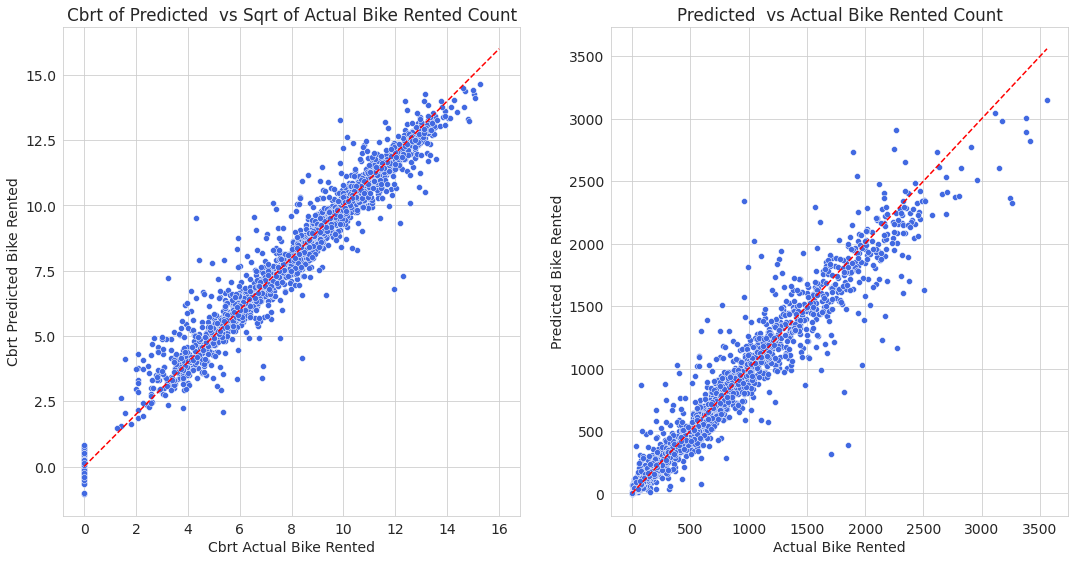

In [ ]:
fig, ax= plt.subplots(figsize= (18, 9), nrows= 1, ncols= 2)

# Scatter plot for sqrt of Predicted  vs sqrt of Actual Bike Rented Count
sns.scatterplot(data= df_residual, x= 'Cbrt Actual Bike Rented', y= 'Cbrt Predicted Bike Rented', 
                ax= ax[0]).set_title("Cbrt of Predicted  vs Sqrt of Actual Bike Rented Count")

# Scatter plot for Predicted  vs Actual Bike Rented Count
sns.scatterplot(data= df_residual, x= 'Actual Bike Rented', y= 'Predicted Bike Rented', ax= ax[1]).set_title("Predicted  vs Actual Bike Rented Count")

# stright line for ideal prediction 
ax[0].plot([0,16], [0,16], ls= '--', color= 'red')
ax[1].plot([0,3560], [0,3560], ls= '--', color= 'red'); 

In [ ]:
# Correlation of Prediction and Actual values, for straight line its value is 1
correlation_value_sqrt = df_residual['Cbrt Predicted Bike Rented'].corr(df_residual['Cbrt Actual Bike Rented'])

# Correlation of SQRT of Prediction and SQRT of Actual values, for straight line its value is 1
correlation_value = df_residual['Predicted Bike Rented'].corr(df_residual['Actual Bike Rented'])

print(f"Correlation between sqrt of actual and predicted Bike Rented Count is {correlation_value_sqrt: .2f}")
print(f"Correlation between actual and predicted Bike Rented Count is {correlation_value: .2f}")

Correlation between sqrt of actual and predicted Bike Rented Count is  0.98
Correlation between actual and predicted Bike Rented Count is  0.97


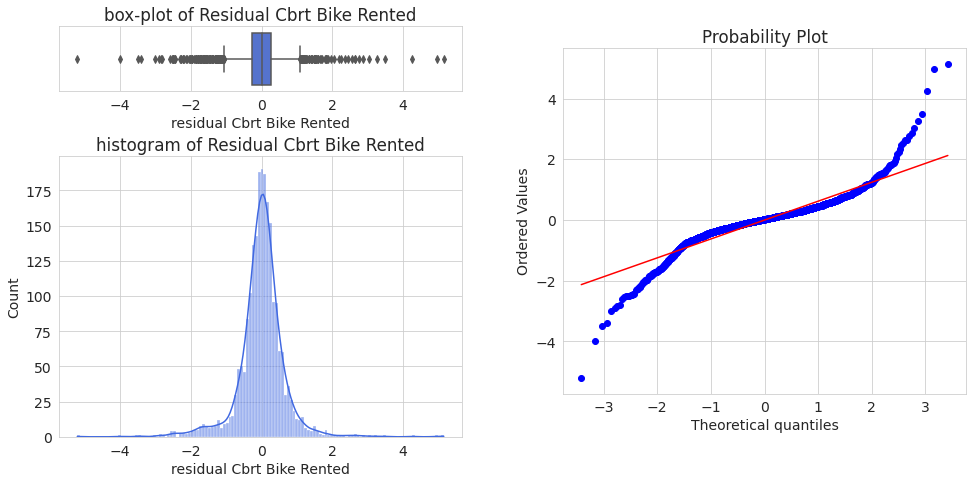

In [ ]:
# residual plot residual Cbrt Bike Rented'
diagnostic_plots(df_residual['residual Cbrt Bike Rented'], "Residual Cbrt Bike Rented")

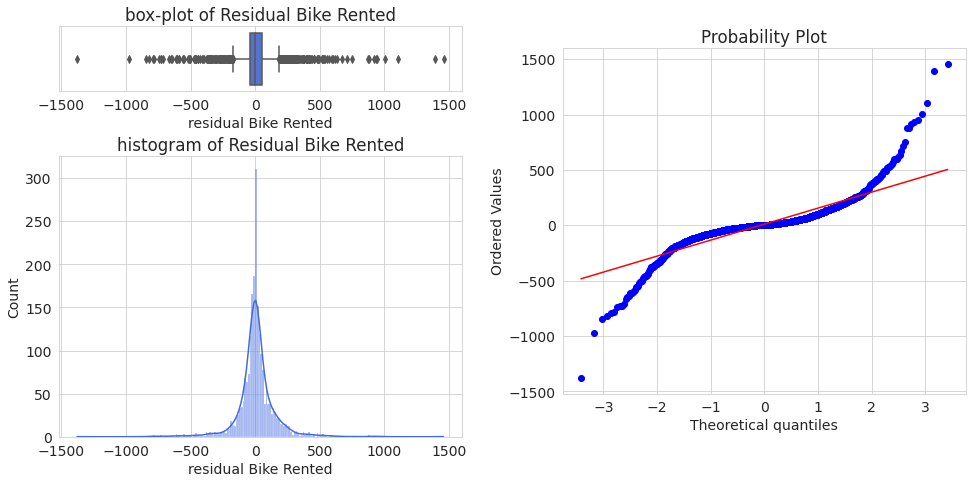

In [ ]:
# residual plot residual  Bike Rented'
diagnostic_plots(df_residual['residual Bike Rented'], "Residual Bike Rented")

* X - axis represent the Theoretical quantiles and y - axis represent actual/ sample quantiles.
* For normal distribution , all blue points should lie on red lines.

>probplot plot for residuals of  Actual Bike Rent Count
  * Points between -2 to 2 corresponding to Theoretical quantiles approximately follow normal distribution.
  * points greater than 2 and less than -2 in Theoretical quantiles, show that residual plot have high skewness on both the  side means it have heavy tail compared to normal distribution. 
 

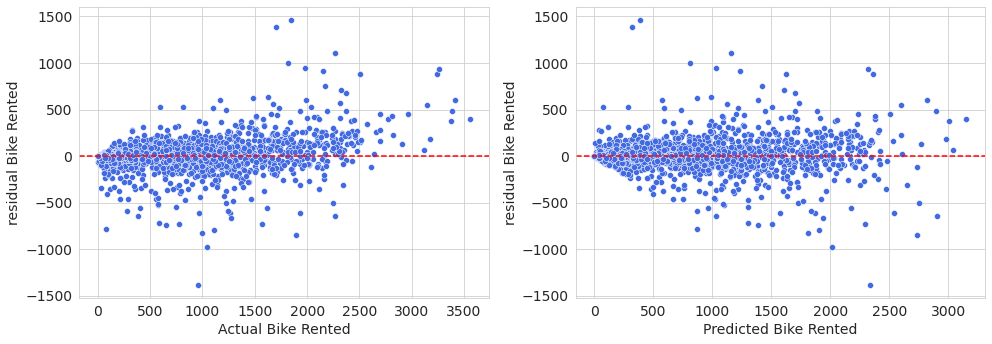

In [ ]:
fig, axes = plt.subplots(figsize=(14, 5), nrows= 1, ncols= 2)

# residual vs Actual Bike Count
sns.scatterplot(data= df_residual, x= 'Actual Bike Rented', y= 'residual Bike Rented', ax= axes[0])
axes[0].axhline(y=0, color='r', linestyle='--')

# residual vs Predicted Bike Count
sns.scatterplot(data= df_residual, x= 'Predicted Bike Rented', y= 'residual Bike Rented', ax= axes[1])
axes[1].axhline(y=0, color='r', linestyle='--')
plt.tight_layout();

# Model Persistence (Saving and Loading a Model)

In [ ]:
import joblib

joblib.dump(final_model, 'Bike Sharing Demand Prediction.joblib') 

# The object can be loaded back using joblib.load
loaded_model = joblib.load('Bike Sharing Demand Prediction.joblib')

# SHAP

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 6.6 MB/s 


In [ ]:
# This entire code block is to appease the shapley package.  Shapley won't accept
# pipelines, and shapley won't accept categorical features.  The purpose 
# of this code block is to make a copy of my dataframe and do the ordinal encoding 
# manually so that I can successfully access the shapley tools

target = 'Rented Bike Count'

# df_final have encoded categorical features with numerical features
df_copy = df_final.copy()


X_shap = df_copy.drop(columns=target)
y_shap = df_copy[target]

# Creating Test and Training splits
X_train_shap, X_test_shap, y_train_shap, y_test_shap = train_test_split(X_shap, y_shap, test_size = 0.8, random_state=42)

# Creating a model which is intentionally not part of a pipeline

lgbm_modelshap = lightgbm.LGBMRegressor(
    bootstrap=True, 
    max_depth=30, 
    n_estimators=1500, 
    random_state=42)

lgbm_modelshap.fit(X_train_shap, y_train_shap)

LGBMRegressor(bootstrap=True, max_depth=30, n_estimators=1500, random_state=42)

In [ ]:
import shap
sample = X_test_shap.iloc[42]
sample

Hour                            7.00
Temperature(°C)                 9.50
Humidity(%)                    72.00
Wind speed (m/s)                0.20
Visibility (10m)             1017.00
Dew point temperature(°C)       4.60
Solar Radiation (MJ/m2)         0.04
Rainfall(mm)                    0.00
Snowfall (cm)                   0.00
Day                            31.00
WeekDay                         5.00
Month                           3.00
Seasons_Spring                  1.00
Seasons_Summer                  0.00
Seasons_Winter                  0.00
Holiday_No Holiday              1.00
Functioning Day_Yes             1.00
Year_2018                       1.00
Name: 2887, dtype: float64

100%|===================| 1749/1752 [02:48<00:00]       

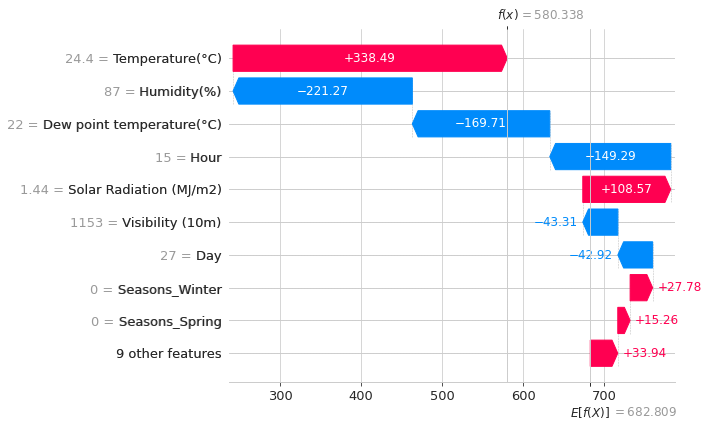

In [ ]:
# tree explainer for tree based model
explainer = shap.TreeExplainer(lgbm_modelshap, X_test_shap)
shap_values = explainer(X_train_shap, check_additivity=False)
shap.plots.waterfall(shap_values[42])

- For this observation , predicted value is 580.338 and base value is 682.809 (mean of test data).
- Features in red color features are responsible for increasing the value of prediction, while those in blue are said to decrease the value of prediction.

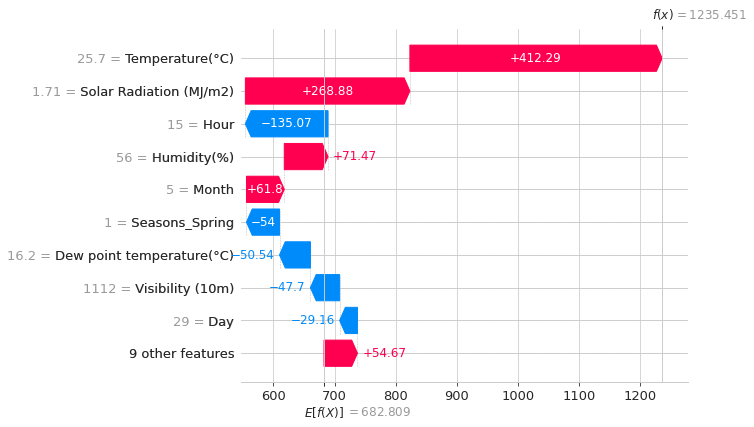

In [ ]:
# Another example
shap.plots.waterfall(shap_values[9])

<a href="https://www.freeiconspng.com/img/6071" title="Image from freeiconspng.com"><img src="https://www.freeiconspng.com/uploads/summary-png-icon-1.png" width="70" alt="Free Files Summary" /></a>

# ***Summary*** 
---

>The following topics were covered in this notebook:
- Downloading a real-world dataset
- Looking for null and missing values
- Try to get some insights from data
- Correlation plot
- Data Cleaning, Preprocessing and Feature engineering 
- Preparing a dataset for training
- Training and interpretation with different models
- Overfitting, hyperparameter tuning & regularization
- Predict and calculate sum evaluation metrics for model
- Model Persistence saving and loading the model
- Making predictions on single inputs and its explain it with the help of SHAP.

<br/>

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=14dpaeXX-ajsM8quwe3dCCdQdrdvf29iI" align="left" hspace="20px" vspace="20px" width="45" height="60" ></p>

#**Overall Conclusion**
----
----
<br/>


* Most numbers of Bikes were rented in Summer, followed by Autumn, Spring, and Winter. May-July is the peak Bike renting Season, and Dec-Feb is the least preferred month for bike renting.
* Majority of the client in the bike rental sector belongs to the Working class. This is evident from EDA analysis where bike demand is more on weekdays, working days in Seoul.
* Temperature of 20-30 Degrees, evening time 4 pm- 8 pm,Humidity between 40%-60% are the most favorable parameters where the Bike demand is at its peak.
* Temperature, Hour of the day, Solar radiation, and Humidity are major driving factors for the Bike rent demand.
* Feature and Labels had a weak linear relationship, hence the prediction from the linear model was very low. Best predictions are obtained with a LightGBM model with an R2 Score of 0.9555 means 95.55 percente of the variance in the dependent variable that is predictable from the independent variables.